## Imports

In [311]:
import pandas as pd
import numpy as np
import pickle
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold



## Set Options

In [312]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline
sns.set_style('darkgrid')

random.seed(129)

# Combined Data

## Load Data

In [313]:
df = pickle.load(open('./clean_data/total.pkl', 'rb'))

## Inspect Data

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5235 entries, 0 to 5234
Data columns (total 46 columns):
Player                     5235 non-null object
Club                       5235 non-null object
POS                        5235 non-null object
GP                         5235 non-null float64
GS                         5235 non-null float64
MINS                       5235 non-null float64
G                          5235 non-null float64
A                          5235 non-null float64
SHTS_FP                    5235 non-null float64
SOG                        5235 non-null float64
GWG                        5235 non-null float64
HmG                        5235 non-null float64
RdG                        5235 non-null float64
Gp90                       5235 non-null float64
SCpct                      5235 non-null float64
Year                       5235 non-null int64
Season                     5235 non-null object
GWA                        5235 non-null float64
HmA              

In [315]:
pd.concat([df.head(10), df.tail(10)], axis=0)

Player Club  POS    GP    GS    MINS     G     A  SHTS_FP   SOG  GWG   HmG  RdG  Gp90  SCpct  Year Season  GWA   HmA  RdA  Ap90  SOGpct    FC    FS   OFF   YC   RC  PKG_FP  PKA_FP    Last Name First Name  Base Salary  Guaranteed Compensation        Date  SHTS_GK   SV   GA  GAA    W    L    T  ShO  Wpct  SvPct  PKG_GK  PKA_GK
0       Luciano Emilio   DC    F  29.0  28.0  2410.0  20.0   1.0     79.0  47.0  4.0  12.0  8.0  0.75   25.3  2007    REG  1.0   1.0  0.0  0.04    59.5  35.0  39.0  21.0  2.0  0.0     0.0     0.0       Emilio    Luciano    265000.00                293125.00  2007-08-31      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0     0.0
1     Juan Pablo Angel   NY    F  24.0  24.0  2125.0  19.0   5.0     97.0  53.0  5.0  13.0  6.0  0.80   19.6  2007    REG  2.0   3.0  2.0  0.21    54.6  31.0  20.0  42.0  2.0  1.0     5.0     5.0  Pablo Angel       Juan   1500000.00               1593750.00  2007-08-31      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0     0.0
2      Taylor Twellman   NE    F  26.0  25.0  2283.0  16.0   3.0     90.0  55.0  5.0   7.0  9.0  0.63   17.8  2007    REG  1.0   2.0  1.0  0.12    61.1  13.0  41.0  21.0  2.0  0.0     0.0     0.0     Twellman     Taylor    325008.00                350008.00  2007-08-31      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0     0.0
3        Eddie Johnson   KC    F  24.0  24.0  2149.0  15.0   6.0     75.0  43.0  6.0   8.0  7.0  0.63   20.0  2007    REG  2.0   3.0  3.0  0.25    57.3  21.0  57.0  50.0  6.0  0.0     1.0     1.0      Johnson      Eddie    750000.00                875000.00  2007-08-31      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0     0.0
4       Maykel Galindo  CHV    F  28.0  24.0  2021.0  12.0   5.0     55.0  28.0  5.0   8.0  4.0  0.53   21.8  2007    REG  3.0   3.0  2.0  0.22    50.9  44.0  53.0  30.0  6.0  0.0     0.0     0.0      Galindo     Maykel     72500.00                 72500.00  2007-08-31      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0     0.0
5           Ante Razov  CHV    F  26.0  24.0  2041.0  11.0   8.0     85.0  42.0  4.0   9.0  2.0  0.49   12.9  2007    REG  4.0   5.0  3.0  0.35    49.4  37.0  33.0  30.0  2.0  0.0     1.0     1.0        Razov       Ante    245000.00                248750.00  2007-08-31      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0     0.0
6       Landon Donovan   LA  M-F  25.0  24.0  2191.0   8.0  13.0     44.0  20.0  1.0   5.0  3.0  0.33   18.2  2007    REG  3.0  10.0  3.0  0.53    45.5  19.0  40.0  11.0  3.0  0.0     5.0     6.0      Donovan     Landon    900000.00                900000.00  2007-08-31      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0     0.0
7            Ben Olsen   DC    M  24.0  21.0  1881.0   7.0   7.0     29.0  17.0  3.0   5.0  2.0  0.33   24.1  2007    REG  2.0   6.0  1.0  0.33    58.6  49.0  41.0  11.0  8.0  0.0     0.0     0.0        Olsen        Ben    155000.00                177500.00  2007-08-31      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0     0.0
8     Alejandro Moreno  CLB    F  29.0  27.0  2357.0   7.0   7.0     54.0  32.0  1.0   2.0  5.0  0.27   13.0  2007    REG  1.0   4.0  3.0  0.27    59.3  54.0  93.0  32.0  3.0  0.0     0.0     0.0       Moreno  Alejandro    120000.00                125000.00  2007-08-31      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0     0.0
9         Jaime Moreno   DC    F  21.0  15.0  1439.0   7.0   6.0     34.0  18.0  2.0   5.0  2.0  0.44   20.6  2007    REG  1.0   5.0  1.0  0.38    52.9  24.0  30.0  15.0  3.0  0.0     4.0     4.0       Moreno      Jaime    250000.00                275000.00  2007-08-31      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0     0.0     0.0
5225    Logan Ketterer  CLB   GK   0.0   0.0     0.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.00    0.0  2017    REG  0.0   0.0  0.0  0.00     0.0   0.0   0.0   0.0  0.0  0.0     0.0     0.0     Ketterer      Logan     53004.00           

In [316]:
df.sample(20, random_state=129)

Player Club POS    GP    GS    MINS     G     A  SHTS_FP   SOG  GWG   HmG  RdG  Gp90  SCpct  Year Season  GWA  HmA  RdA  Ap90  SOGpct    FC    FS   OFF   YC   RC  PKG_FP  PKA_FP        Last Name First Name  Base Salary  Guaranteed Compensation        Date  SHTS_GK    SV    GA   GAA     W    L    T   ShO  Wpct  SvPct  PKG_GK  PKA_GK
2042         Michael Nanchoff  VAN   M   9.0   1.0   145.0   0.0   0.0      2.0   0.0  0.0   0.0  0.0  0.00    0.0  2012    REG  0.0  0.0  0.0  0.00     0.0   2.0   2.0   0.0  1.0  0.0     0.0     0.0         Nanchoff    Michael      66000.0                101000.00  2012-05-15      0.0   0.0   0.0  0.00   0.0  0.0  0.0   0.0   0.0    0.0     0.0     0.0
4664               Brad Guzan  CHV  GK  27.0  27.0  2430.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.00    0.0  2007    REG  0.0  0.0  0.0  0.00     0.0   0.0   0.0   0.0  0.0  0.0     0.0     0.0            Guzan       Brad      52237.5                 67237.50  2007-08-31    119.0  87.0  25.0  0.93  14.0  6.0  7.0  13.0  51.9   73.1     2.0     3.0
4904             Kyle Reynish  RSL  GK   3.0   3.0   270.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.00    0.0  2012    REG  0.0  0.0  0.0  0.00     0.0   0.0   0.0   0.0  0.0  0.0     0.0     0.0          Reynish       Kyle      66000.0                 74304.00  2012-05-15      8.0   6.0   2.0  0.67   1.0  0.0  2.0   2.0  33.3   75.0     0.0     0.0
159               Josh Tudela   LA   M   9.0   9.0   779.0   0.0   1.0      3.0   2.0  0.0   0.0  0.0  0.00    0.0  2007    REG  1.0  1.0  0.0  0.12    66.7  15.0   6.0   0.0  2.0  0.0     0.0     0.0           Tudela       Josh      17700.0                 17700.00  2007-08-31      0.0   0.0   0.0  0.00   0.0  0.0  0.0   0.0   0.0    0.0     0.0     0.0
699               Jorge Rojas   NY   M  21.0  19.0  1515.0   2.0   2.0     36.0  14.0  1.0   2.0  0.0  0.12    5.6  2009    REG  0.0  1.0  1.0  0.12    38.9  18.0  18.0   1.0  1.0  1.0     0.0     0.0            Rojas      Jorge     120000.0                130000.00  2009-09-15      0.0   0.0   0.0  0.00   0.0  0.0  0.0   0.0   0.0    0.0     0.0     0.0
3748          Julian Buescher   DC   M  20.0   3.0   584.0   1.0   4.0      8.0   4.0  0.0   1.0  0.0  0.15   12.5  2016    REG  0.0  1.0  3.0  0.62    50.0  21.0  12.0   1.0  3.0  0.0     0.0     0.0         Buescher     Julian      70000.0                 79700.00  2016-05-15      0.0   0.0   0.0  0.00   0.0  0.0  0.0   0.0   0.0    0.0     0.0     0.0
1823               Pat Noonan   LA   F  10.0   1.0   174.0   1.0   0.0      3.0   2.0  0.0   1.0  0.0  0.52   33.3  2012    REG  0.0  0.0  0.0  0.00    66.7   2.0   1.0   1.0  0.0  0.0     0.0     0.0           Noonan        Pat      70000.0                 70000.00  2012-05-15      0.0   0.0   0.0  0.00   0.0  0.0  0.0   0.0   0.0    0.0     0.0     0.0
2698              Nick DeLeon   DC   D  32.0  31.0  2707.0   2.0   5.0     47.0  18.0  0.0   0.0  2.0  0.07    4.3  2014    REG  0.0  4.0  1.0  0.17    38.3  31.0  25.0   1.0  3.0  0.0     0.0     0.0           DeLeon       Nick      85690.0                120690.00  2014-04-01      0.0   0.0   0.0  0.00   0.0  0.0  0.0   0.0   0.0    0.0     0.0     0.0
3659           Steven Gerrard   LA   M  21.0  18.0  1491.0   3.0  11.0     32.0  11.0  1.0   3.0  0.0  0.18    9.4  2016    REG  1.0  6.0  5.0  0.66    34.4  20.0  15.0   0.0  2.0  0.0     0.0     1.0          Gerrard     Steven    6000000.0               6132500.00  2016-05-15      0.0   0.0   0.0  0.00   0.0  0.0  0.0   0.0   0.0    0.0     0.0     0.0
2813                Sal Zizzo   KC   D  19.0  13.0  1097.0   0.0   3.0     19.0   7.0  0.0   0.0  0.0  0.00    0.0  2014    REG  0.0  1.0  2.0  0.25    36.8   8.0   9.0   0.0  0.0  0.0     0.0     0.0            Zizzo        Sal      77000.0                 91045.71  2014-04-01      0.0   0.0   0.0  0.00   0.0  0.0  0.0   0.0   0.0    0.0     0.0     0.0
680              Justin Braun  CHV   F  15.0  14.0  1211.0   3.0   2.0     38.0  16.0  2.0   2.0

## Fix Integer Column Dtypes

In [317]:
# Set Integer Column Dtypes
int_cols = ['GP', 'GS', 'MINS', 'G', 'A', 'SHTS_FP', 'SOG', 'GWG', 
            'HmG', 'RdG', 'Year', 'GWA', 'HmA', 'RdA', 'FC', 'FS', 
            'OFF', 'YC', 'RC', 'PKG_FP', 'PKA_FP', 'SHTS_GK', 'SV',
            'GA', 'W', 'L', 'T', 'ShO', 'PKG_GK', 'PKA_GK']
for col in int_cols:
    df[col] = df[col].astype(int)

### Rename, Reorder, and Drop Columns

In [318]:
# Rename columns that have spaces in names
df.rename(columns={'Base Salary': 'Salary', 
                   'Guaranteed Compensation': 'Total', 
                   'First Name': 'First',
                   'Last Name': 'Last'}, inplace=True)

In [319]:
# Reorder and drop useless predictors
col_order = ['Salary', 'Total', 'Player', 'Club', 'POS', 'Year', 'GP', 'GS', 'MINS', 
             'G', 'A', 'SHTS_FP', 'SOG', 'GWG', 'HmG', 'RdG', 'Gp90', 'SCpct', 
             'GWA', 'HmA', 'RdA', 'Ap90', 'SOGpct', 'FC', 'FS', 'OFF', 'YC', 
             'RC', 'PKG_FP', 'PKA_FP', 'SHTS_GK', 'SV', 'GA', 'GAA', 'W', 'L', 
             'T', 'ShO', 'Wpct', 'SvPct', 'PKG_GK', 'PKA_GK']
df = df.reindex(columns=col_order)

In [320]:
df.sample(20, random_state=129)

Salary       Total                   Player Club POS  Year  GP  GS  MINS   G   A  SHTS_FP  SOG  GWG  HmG  RdG  Gp90  SCpct  GWA  HmA  RdA  Ap90  SOGpct  FC  FS  OFF  YC  RC  PKG_FP  PKA_FP  SHTS_GK  SV  GA   GAA   W  L  T  ShO  Wpct  SvPct  PKG_GK  PKA_GK
2042    66000.0   101000.00         Michael Nanchoff  VAN   M  2012   9   1   145   0   0        2    0    0    0    0  0.00    0.0    0    0    0  0.00     0.0   2   2    0   1   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
4664    52237.5    67237.50               Brad Guzan  CHV  GK  2007  27  27  2430   0   0        0    0    0    0    0  0.00    0.0    0    0    0  0.00     0.0   0   0    0   0   0       0       0      119  87  25  0.93  14  6  7   13  51.9   73.1       2       3
4904    66000.0    74304.00             Kyle Reynish  RSL  GK  2012   3   3   270   0   0        0    0    0    0    0  0.00    0.0    0    0    0  0.00     0.0   0   0    0   0   0       0       0        8   6   2  0.67   1  0  2    2  33.3   75.0       0       0
159     17700.0    17700.00              Josh Tudela   LA   M  2007   9   9   779   0   1        3    2    0    0    0  0.00    0.0    1    1    0  0.12    66.7  15   6    0   2   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
699    120000.0   130000.00              Jorge Rojas   NY   M  2009  21  19  1515   2   2       36   14    1    2    0  0.12    5.6    0    1    1  0.12    38.9  18  18    1   1   1       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
3748    70000.0    79700.00          Julian Buescher   DC   M  2016  20   3   584   1   4        8    4    0    1    0  0.15   12.5    0    1    3  0.62    50.0  21  12    1   3   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
1823    70000.0    70000.00               Pat Noonan   LA   F  2012  10   1   174   1   0        3    2    0    1    0  0.52   33.3    0    0    0  0.00    66.7   2   1    1   0   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
2698    85690.0   120690.00              Nick DeLeon   DC   D  2014  32  31  2707   2   5       47   18    0    0    2  0.07    4.3    0    4    1  0.17    38.3  31  25    1   3   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
3659  6000000.0  6132500.00           Steven Gerrard   LA   M  2016  21  18  1491   3  11       32   11    1    3    0  0.18    9.4    1    6    5  0.66    34.4  20  15    0   2   0       0       1        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
2813    77000.0    91045.71                Sal Zizzo   KC   D  2014  19  13  1097   0   3       19    7    0    0    0  0.00    0.0    0    1    2  0.25    36.8   8   9    0   0   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
680     20100.0    20100.00             Justin Braun  CHV   F  2009  15  14  1211   3   2       38   16    2    2    1  0.22    7.9    1    2    0  0.15    42.1  20  17   11   1   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
2610  6000000.0  6180000.00            Jermain Defoe  TOR   F  2014  19  17  1529  11   2       58   25    5    8    3  0.65   19.0    0    0    2  0.12    43.1  22  23   25   5   0       3       4        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
1108    64620.0    75870.00        Jackson Goncalves  DAL   M  2010  12   9   805   0   1        7    3    0    0    0  0.00    0.0    1    0    1  0.11    42.9  10   4    1   0   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
2594   330000.0   372500.00  Bradley Wright-Phillips   NY   F  2014  32  29  2573  27   2      109   57    6   18    9  0.94   24.8    0    1    1  0.07    52.3  45  38   33   3   0       6       6        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
1693   100000.0   202000.00       

In [321]:
df.shape

(5235, 42)

In [322]:
tmp = df[df.Salary > 1e6]

In [323]:
tmp.describe()

Salary         Total         Year          GP          GS         MINS           G           A     SHTS_FP         SOG         GWG         HmG         RdG        Gp90       SCpct         GWA         HmA         RdA        Ap90     SOGpct          FC          FS         OFF          YC          RC      PKG_FP      PKA_FP     SHTS_GK          SV          GA         GAA           W           L           T         ShO        Wpct       SvPct      PKG_GK      PKA_GK
count  1.130000e+02  1.130000e+02   113.000000  113.000000  113.000000   113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.00000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000
mean   2.976206e+06  3.310407e+06  2013.840708   22.707965   20.716814  1834.230088    7.796460    5.389381   54.203540   22.053097    2.079646    4.752212    3.044248    0.360177   13.169912    1.592920    3.336283    2.053097    0.252035   38.90177   24.256637   30.070796   11.495575    3.353982    0.185841    1.185841    1.557522    1.761062    1.221239    0.513274    0.023717    0.115044    0.150442    0.106195    0.106195    0.560177    1.245133    0.079646    0.115044
std    1.785013e+06  1.935549e+06     2.836517    7.252686    7.551572   667.097980    6.424228    4.516702   38.891828   16.944679    1.895208    4.212081    2.931934    0.254821    8.291636    1.693671    2.959882    2.090970    0.177523   14.13728   14.211275   18.217298   13.888024    2.199514    0.473375    1.724553    1.968221   13.645561    9.355799    4.066666    0.179892    0.863467    1.344441    0.838396    0.805814    4.220095    9.330107    0.599726    0.863467
min    1.000008e+06  1.050000e+06  2007.000000    4.000000    1.000000    78.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.00000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%    1.500000e+06  1.668750e+06  2012.000000   19.000000   16.000000  1416.000000    2.000000    2.000000   26.000000    7.000000    1.000000    1.000000    0.000000    0.140000    8.300000    0.000000    1.000000    0.000000    0.120000   33.30000   14.000000   17.000000    1.000000    2.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
50%    2.227500e+06  2.500000e+06  2015.000000   24.000000   22.000000  1980.000000    7.000000    4.000000   43.000000   19.000000    1.000000    4.000000    2.000000    0.340000   12.500000    1.000000    2.000000    1.000000    0.210000   40.60000   23.000000   27.000000    7.000000    3.000000    0.000000    0.000000    1.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
75%    4.875000e+06  4.875000e+06  2016.000000   28.000000   26.000000  2276.000000   12.000000    9.000000   77.000000   32.000000    3.000000    7.000000    5.000000    0.570000   17.500000    3.000000    5.000000    3.000000    0.350000   45.50000   32.000000   41.000000   15.000000    5.000000    0.000000    2.000000    3.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
max    6.200004e+06  7.115556e+06  2017.000000   34.000000   34.000000  2946.000000   24.000000   19.000000  181.000000   73.000000    7.000000   19.000000   10.000000    1.140000  

In [324]:
tmp.sample(10)

Salary       Total            Player Club POS  Year  GP  GS  MINS   G   A  SHTS_FP  SOG  GWG  HmG  RdG  Gp90  SCpct  GWA  HmA  RdA  Ap90  SOGpct  FC  FS  OFF  YC  RC  PKG_FP  PKA_FP  SHTS_GK  SV  GA  GAA  W  L  T  ShO  Wpct  SvPct  PKG_GK  PKA_GK
3102  3913008.0  4605942.00     Clint Dempsey  SEA   M  2015  20  20  1742  10  10       61   27    4    7    3  0.52   16.4    4    5    5  0.52    44.3  18  39    5   1   0       1       1        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
4113  4875000.0  4875000.00     Jozy Altidore  TOR   F  2017  27  25  2194  15   6       68   30    5    8    7  0.62   22.1    3    4    2  0.25    44.1  50  49   14   8   0       3       5        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
1212  1400004.0  1788060.50     Nery Castillo  CHI   F  2010   8   6   487   0   0        9    5    0    0    0  0.00    0.0    0    0    0  0.00    55.6   1   5   15   1   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
3905  1200000.0  1455000.00     Nelson Valdez  SEA   F  2016  24   8   900   0   1       30   11    0    0    0  0.00    0.0    0    1    0  0.10    36.7  21  22    9   4   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
3146  1125000.0  1170000.00       Kevin Doyle  COL   F  2015  20  16  1489   5   2       34   13    4    4    1  0.30   14.7    2    0    2  0.12    38.2  22  24    7   3   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
2522  1250000.0  1663323.33  Danny Koevermans  TOR   F  2013   4   1    78   0   0        2    2    0    0    0  0.00    0.0    0    0    0  0.00   100.0   3   1    1   1   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
3804  1100004.0  1166254.00  Alejandro Bedoya  PHI   M  2016  10  10   844   1   0       10    4    0    0    1  0.11   10.0    0    0    0  0.00    40.0  24   7    2   3   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
4158  1750000.0  1973750.00    Yura Movsisyan  RSL   F  2017  28  16  1416   7   0       45   19    2    4    3  0.44   15.6    0    0    0  0.00    42.2  19  16   12   4   0       1       1        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
1328  2917241.0  3417243.15      Robbie Keane   LA   F  2011   4   3   275   2   1        5    3    1    2    0  0.65   40.0    1    1    0  0.33    60.0   1   1    6   0   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
628   1500000.0  1798000.00  Juan Pablo Angel   NY   F  2009  25  25  2133  12   2       81   37    1   10    2  0.51   14.8    1    1    1  0.08    45.7  22  18   34   2   0       2       3        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0

In [325]:
tmp2 = df[df.Salary <= 1e6]

In [326]:
tmp2.describe()

Salary         Total         Year           GP           GS         MINS            G            A      SHTS_FP          SOG          GWG          HmG          RdG         Gp90        SCpct          GWA          HmA          RdA         Ap90       SOGpct           FC           FS          OFF           YC           RC       PKG_FP       PKA_FP      SHTS_GK           SV           GA          GAA            W           L            T          ShO         Wpct        SvPct       PKG_GK      PKA_GK
count     5122.000000  5.122000e+03  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.00000  5122.000000  5122.000000  5122.000000  5122.000000  5122.000000  5122.00000
mean    124336.895137  1.371879e+05  2012.636080    15.323897    12.169270  1092.134518     1.358844     1.322921    13.130027     4.820773     0.363725     0.811597     0.547247     0.091947     5.775010     0.362749     0.797735     0.525185     0.091099    23.344201    13.513276    12.354159     2.443577     1.794807     0.129637     0.103085     0.129637     5.507029     3.779774     1.616751     0.113239     0.440648     0.43401     0.320968     0.314721     2.421339     5.087583     0.137446     0.17337
std     130594.069883  1.446536e+05     3.078598    11.129650    10.714453   936.037464     2.717387     2.204533    18.798687     7.827763     0.895363     1.721091     1.242440     0.215693    10.192087     0.795173     1.478377     1.013986     0.356923    23.435208    14.174930    14.915930     5.448239     2.199010     0.379601     0.536424     0.630526    24.667040    17.079844     7.218988     0.438221     2.099481     1.98009     1.524283     1.515697    10.270522    18.033658     0.710789     0.87492
min      12900.000000  1.290000e+04  2007.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.00000     0.000000     0.000000     0.000000     0.000000     0.000000     0.00000
25%      50000.000000  5.255431e+04  2010.000000     4.000000     1.000000   165.250000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.00000     0.000000     0.000000     0.000000     0.000000     0.000000     0.00000
50%      77500.000000  9.000000e+04  2013.000000    16.000000    10.000000   924.000000     0.000000     0.000000     6.000000     1.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000    23.500000    10.000000     7.000000     0.000000     1.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.00000     0.000000     0.000000     0.000000     0.000000     0.000000     0.00000
75%     150000.000000  1.676495e+05  2015.000000    26.000000    22.000000  1920.000000     2.000000     2.000000    18.000000     6.000000     0.000000     1.000000     1.000000     0.110000    10.000000     0.000000     1.000000     1.000000     0.130000    40.000000    22.000000    19.000000     2.000000     3.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.0000

In [328]:
tmp2.sample(10)

Salary      Total          Player   Club  POS  Year  GP  GS  MINS  G  A  SHTS_FP  SOG  GWG  HmG  RdG  Gp90  SCpct  GWA  HmA  RdA  Ap90  SOGpct  FC  FS  OFF  YC  RC  PKG_FP  PKA_FP  SHTS_GK  SV  GA   GAA   W  L  T  ShO  Wpct  SvPct  PKG_GK  PKA_GK
2847  114000.00  120333.33  Nathan Sturgis    COL    M  2014  22  13  1201  0  1        3    0    0    0    0  0.00    0.0    1    0    1  0.07     0.0  20  11    1   5   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
2444   35125.00   35125.00    Dylan Remick    SEA    D  2013   1   0    25  0  0        0    0    0    0    0  0.00    0.0    0    0    0  0.00     0.0   1   0    0   0   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
1709  310000.00  354000.00       Brek Shea    DAL    D  2012  21  20  1747  3  2       55   20    1    2    1  0.15    5.5    1    0    2  0.10    36.4  28  20   14   1   0       2       2        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
3492  225000.00  225000.00  Bakary Soumare    DAL    D  2015  10   9   835  0  0        2    0    0    0    0  0.00    0.0    0    0    0  0.00     0.0  10   2    0   3   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
4334   99999.96  108249.96  Miguel Camargo  NYCFC    M  2017   8   2   176  1  0        3    1    0    1    0  0.51   33.3    0    0    0  0.00    33.3   4   4    0   1   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
2721   36504.00   36504.00   Pedro Ribeiro    PHI  M-F  2014   9   3   351  2  0       11    3    1    2    0  0.51   18.2    0    0    0  0.00    27.3   6   5    2   0   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
2738  125000.00  152000.00       Wil Trapp    CLB    M  2014  28  28  2486  1  4       11    3    0    0    1  0.04    9.1    2    4    0  0.14    27.3  37  23    0   6   2       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
5065   66000.00   66000.00   Chris Konopka    TOR   GK  2015  21  21  1890  0  0        0    0    0    0    0  0.00    0.0    0    0    0  0.00     0.0   0   0    0   0   0       0       0       92  62  31  1.48  11  7  3    4  52.4   67.4       4       6
1325   90000.00  139000.00  Rodney Wallace    POR    F  2011  25  22  1973  2  2       19    6    1    2    0  0.09   10.5    0    0    2  0.09    31.6  29  14    2   6   0       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0
4035  350004.00  383004.00   Maxime Chanot  NYCFC    D  2016   6   5   495  0  0        1    0    0    0    0  0.00    0.0    0    0    0  0.00     0.0   6   2    0   2   1       0       0        0   0   0  0.00   0  0  0    0   0.0    0.0       0       0

## Feature Engineering

### Create Additional Features

In [12]:
# Create Bonus column
df.insert(2, 'Bonus', df['Total'] - df['Salary'])
df.head()

Salary      Total     Bonus Club POS  Year  GP  GS  MINS   G  A  SHTS_FP  SOG  GWG  HmG  RdG  Gp90  SCpct  GWA  HmA  RdA  Ap90  SOGpct  FC  FS  OFF  YC  RC  PKG_FP  PKA_FP  SHTS_GK  SV  GA  GAA  W  L  T  ShO  Wpct  SvPct  PKG_GK  PKA_GK
0   265000.0   293125.0   28125.0   DC   F  2007  29  28  2410  20  1       79   47    4   12    8  0.75   25.3    1    1    0  0.04    59.5  35  39   21   2   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
1  1500000.0  1593750.0   93750.0   NY   F  2007  24  24  2125  19  5       97   53    5   13    6  0.80   19.6    2    3    2  0.21    54.6  31  20   42   2   1       5       5        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
2   325008.0   350008.0   25000.0   NE   F  2007  26  25  2283  16  3       90   55    5    7    9  0.63   17.8    1    2    1  0.12    61.1  13  41   21   2   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
3   750000.0   875000.0  125000.0   KC   F  2007  24  24  2149  15  6       75   43    6    8    7  0.63   20.0    2    3    3  0.25    57.3  21  57   50   6   0       1       1        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
4    72500.0    72500.0       0.0  CHV   F  2007  28  24  2021  12  5       55   28    5    8    4  0.53   21.8    3    3    2  0.22    50.9  44  53   30   6   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0

### Create Dummy Variables

In [191]:
# Transform Club in dummy matrix
dummy_club = patsy.dmatrix('Club', data=df, return_type='dataframe').astype(int)
dummy_club.head()

Intercept  Club[T.CHI]  Club[T.CHV]  Club[T.CLB]  Club[T.COL]  Club[T.DAL]  Club[T.DC]  Club[T.HOU]  Club[T.KC]  Club[T.LA]  Club[T.MIN]  Club[T.MTL]  Club[T.NE]  Club[T.NY]  Club[T.NYCFC]  Club[T.ORL]  Club[T.PHI]  Club[T.POR]  Club[T.RSL]  Club[T.SEA]  Club[T.SJ]  Club[T.TOR]  Club[T.UNK]  Club[T.VAN]
0          1            0            0            0            0            0           1            0           0           0            0            0           0           0              0            0            0            0            0            0           0            0            0            0
1          1            0            0            0            0            0           0            0           0           0            0            0           0           1              0            0            0            0            0            0           0            0            0            0
2          1            0            0            0            0            0           0            0           0           0            0            0           1           0              0            0            0            0            0            0           0            0            0            0
3          1            0            0            0            0            0           0            0           1           0            0            0           0           0              0            0            0            0            0            0           0            0            0            0
4          1            0            1            0            0            0           0            0           0           0            0            0           0           0              0            0            0            0            0            0           0            0            0            0

In [192]:
# Transform POS into dummy matrix
dummy_pos = patsy.dmatrix('POS', data=df, return_type='dataframe').astype(int)
dummy_pos.head()

Intercept  POS[T.D-M]  POS[T.F]  POS[T.F-M]  POS[T.GK]  POS[T.M]  POS[T.M-D]  POS[T.M-F]
0          1           0         1           0          0         0           0           0
1          1           0         1           0          0         0           0           0
2          1           0         1           0          0         0           0           0
3          1           0         1           0          0         0           0           0
4          1           0         1           0          0         0           0           0

In [198]:
# Merge dummy matrices
dummy_df = pd.concat([dummy_pos, dummy_club.iloc[:, 1:]], axis=1)
dummy_df.head()

Intercept  POS[T.D-M]  POS[T.F]  POS[T.F-M]  POS[T.GK]  POS[T.M]  POS[T.M-D]  POS[T.M-F]  Club[T.CHI]  Club[T.CHV]  Club[T.CLB]  Club[T.COL]  Club[T.DAL]  Club[T.DC]  Club[T.HOU]  Club[T.KC]  Club[T.LA]  Club[T.MIN]  Club[T.MTL]  Club[T.NE]  Club[T.NY]  Club[T.NYCFC]  Club[T.ORL]  Club[T.PHI]  Club[T.POR]  Club[T.RSL]  Club[T.SEA]  Club[T.SJ]  Club[T.TOR]  Club[T.UNK]  Club[T.VAN]
0          1           0         1           0          0         0           0           0            0            0            0            0            0           1            0           0           0            0            0           0           0              0            0            0            0            0            0           0            0            0            0
1          1           0         1           0          0         0           0           0            0            0            0            0            0           0            0           0           0            0            0           0           1              0            0            0            0            0            0           0            0            0            0
2          1           0         1           0          0         0           0           0            0            0            0            0            0           0            0           0           0            0            0           1           0              0            0            0            0            0            0           0            0            0            0
3          1           0         1           0          0         0           0           0            0            0            0            0            0           0            0           1           0            0            0           0           0              0            0            0            0            0            0           0            0            0            0
4          1           0         1           0          0         0           0           0            0            1            0            0            0           0            0           0           0            0            0           0           0              0            0            0            0            0            0           0            0            0            0

## Correlation

In [16]:
# View the correlations
corr = df.corr()
corr

Salary     Total     Bonus      Year        GP        GS      MINS         G         A   SHTS_FP       SOG       GWG       HmG       RdG      Gp90     SCpct       GWA       HmA       RdA      Ap90    SOGpct        FC        FS       OFF        YC        RC    PKG_FP    PKA_FP   SHTS_GK        SV        GA       GAA         W         L         T       ShO      Wpct     SvPct    PKG_GK    PKA_GK
Salary   1.000000  0.994654  0.655304  0.116284  0.164554  0.188815  0.186759  0.355264  0.311695  0.350952  0.337512  0.303347  0.348488  0.298276  0.198915  0.128772  0.244603  0.294906  0.252808  0.080700  0.113419  0.167146  0.245466  0.227807  0.157159  0.038979  0.279590  0.311954 -0.013200 -0.012991 -0.013099 -0.034273 -0.011556 -0.012681 -0.011148 -0.009612 -0.025392 -0.033593 -0.006110 -0.004404
Total    0.994654  1.000000  0.729806  0.112275  0.165483  0.188872  0.186900  0.360339  0.316287  0.359819  0.345599  0.306632  0.352574  0.303790  0.202379  0.128797  0.249129  0.297558  0.259012  0.082137  0.115866  0.167216  0.247267  0.237646  0.156373  0.039758  0.275415  0.308147 -0.014434 -0.014190 -0.014377 -0.035662 -0.012956 -0.013787 -0.012356 -0.010751 -0.026529 -0.034808 -0.006788 -0.005010
Bonus    0.655304  0.729806  1.000000  0.051425  0.121064  0.131534  0.130718  0.283818  0.250036  0.308564  0.293524  0.234679  0.271882  0.247457  0.163467  0.089600  0.202958  0.224183  0.220930  0.066552  0.096658  0.116579  0.183628  0.230162  0.103386  0.032765  0.163616  0.188779 -0.018189 -0.017789 -0.018440 -0.033957 -0.018265 -0.016896 -0.016579 -0.015007 -0.025952 -0.032217 -0.009204 -0.007491
Year     0.116284  0.112275  0.051425  1.000000  0.036306  0.016887  0.018034  0.039855  0.038589  0.045913  0.003414  0.025445  0.047890  0.021102  0.021033 -0.016129  0.019836  0.046839  0.016179  0.021886 -0.093689  0.019417  0.019768 -0.033700  0.008636 -0.026251  0.021297  0.027924 -0.011368 -0.016175  0.004459  0.001666 -0.001280 -0.000727 -0.009246 -0.012759 -0.006349 -0.020616  0.012433  0.014580
GP       0.164554  0.165483  0.121064  0.036306  1.000000  0.934967  0.947053  0.461625  0.536612  0.596876  0.538748  0.387920  0.436634  0.410321  0.208497  0.281242  0.424599  0.490104  0.461005  0.099602  0.401233  0.736315  0.690390  0.372706  0.603477  0.209398  0.215837  0.231343  0.189555  0.190345  0.184134 -0.022275  0.191112  0.176960  0.185355  0.188830  0.057428  0.021583  0.167105  0.172438
GS       0.188815  0.188872  0.131534  0.016887  0.934967  1.000000  0.996343  0.427231  0.514054  0.545286  0.489966  0.366626  0.407002  0.375673  0.123527  0.213695  0.418037  0.476323  0.431639  0.065306  0.291012  0.716851  0.669098  0.310966  0.605363  0.218980  0.225636  0.242275  0.258875  0.259223  0.253343  0.046070  0.256927  0.244671  0.250862  0.254167  0.124474  0.099506  0.226883  0.233746
MINS     0.186759  0.186900  0.130718  0.018034  0.947053  0.996343  1.000000  0.425683  0.511054  0.544036  0.488458  0.364010  0.404750  0.375405  0.128741  0.218532  0.414849  0.472846  0.430141  0.066579  0.299566  0.717811  0.667373  0.309794  0.607716  0.211696  0.225301  0.242118  0.266354  0.266654  0.260774  0.049028  0.264185  0.251849  0.258203  0.261259  0.128532  0.103116  0.233797  0.240929
G        0.355264  0.360339  0.283818  0.039855  0.461625  0.427231  0.425683  1.000000  0.535917  0.872985  0.919648  0.828507  0.945559  0.889290  0.596831  0.484472  0.415460  0.498451  0.447260  0.120528  0.390903  0.460000  0.595002  0.741299  0.282239  0.061426  0.592507  0.617633 -0.110759 -0.109805 -0.111088 -0.128054 -0.104146 -0.108625 -0.104499 -0.103083 -0.116897 -0.139755 -0.096074 -0.098356
A        0.311695  0.316287  0.250036  0.038589  0.536612  0.514054  0.511054  0.535917  1.000000  0.644874  0.611055  0.466276  0.515369  0.464462  0.254890  0.230886  0.780498  0.927861  0.837831  0.285761  0.313690  0.497980  0.653708  0.394235  0.379193  0.080480  0.381007  0.405610 -0.132827 -0.131683 -0.133222 -0.153568 -0.124896 -

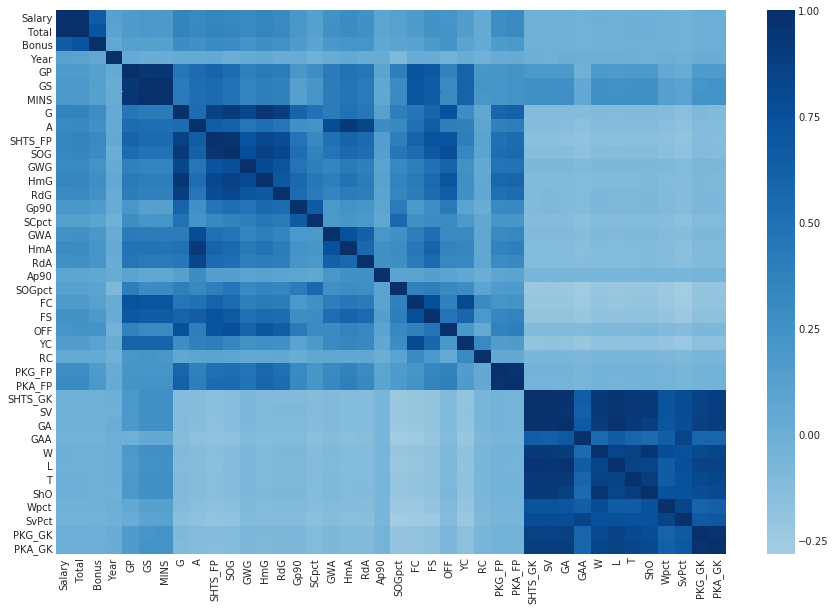

In [17]:
plt.figure(num=None, figsize=(15, 10))
sns.heatmap(corr, center=0, cmap='Blues') #sns.diverging_palette(10, 220, sep=80, n=7))

In [18]:
corr['Salary'].sort_values(ascending=False)

Salary     1.000000
Total      0.994654
Bonus      0.655304
G          0.355264
SHTS_FP    0.350952
HmG        0.348488
SOG        0.337512
PKA_FP     0.311954
A          0.311695
GWG        0.303347
RdG        0.298276
HmA        0.294906
PKG_FP     0.279590
RdA        0.252808
FS         0.245466
GWA        0.244603
OFF        0.227807
Gp90       0.198915
GS         0.188815
MINS       0.186759
FC         0.167146
GP         0.164554
YC         0.157159
SCpct      0.128772
Year       0.116284
SOGpct     0.113419
Ap90       0.080700
RC         0.038979
PKA_GK    -0.004404
PKG_GK    -0.006110
ShO       -0.009612
T         -0.011148
W         -0.011556
L         -0.012681
SV        -0.012991
GA        -0.013099
SHTS_GK   -0.013200
Wpct      -0.025392
SvPct     -0.033593
GAA       -0.034273
Name: Salary, dtype: float64

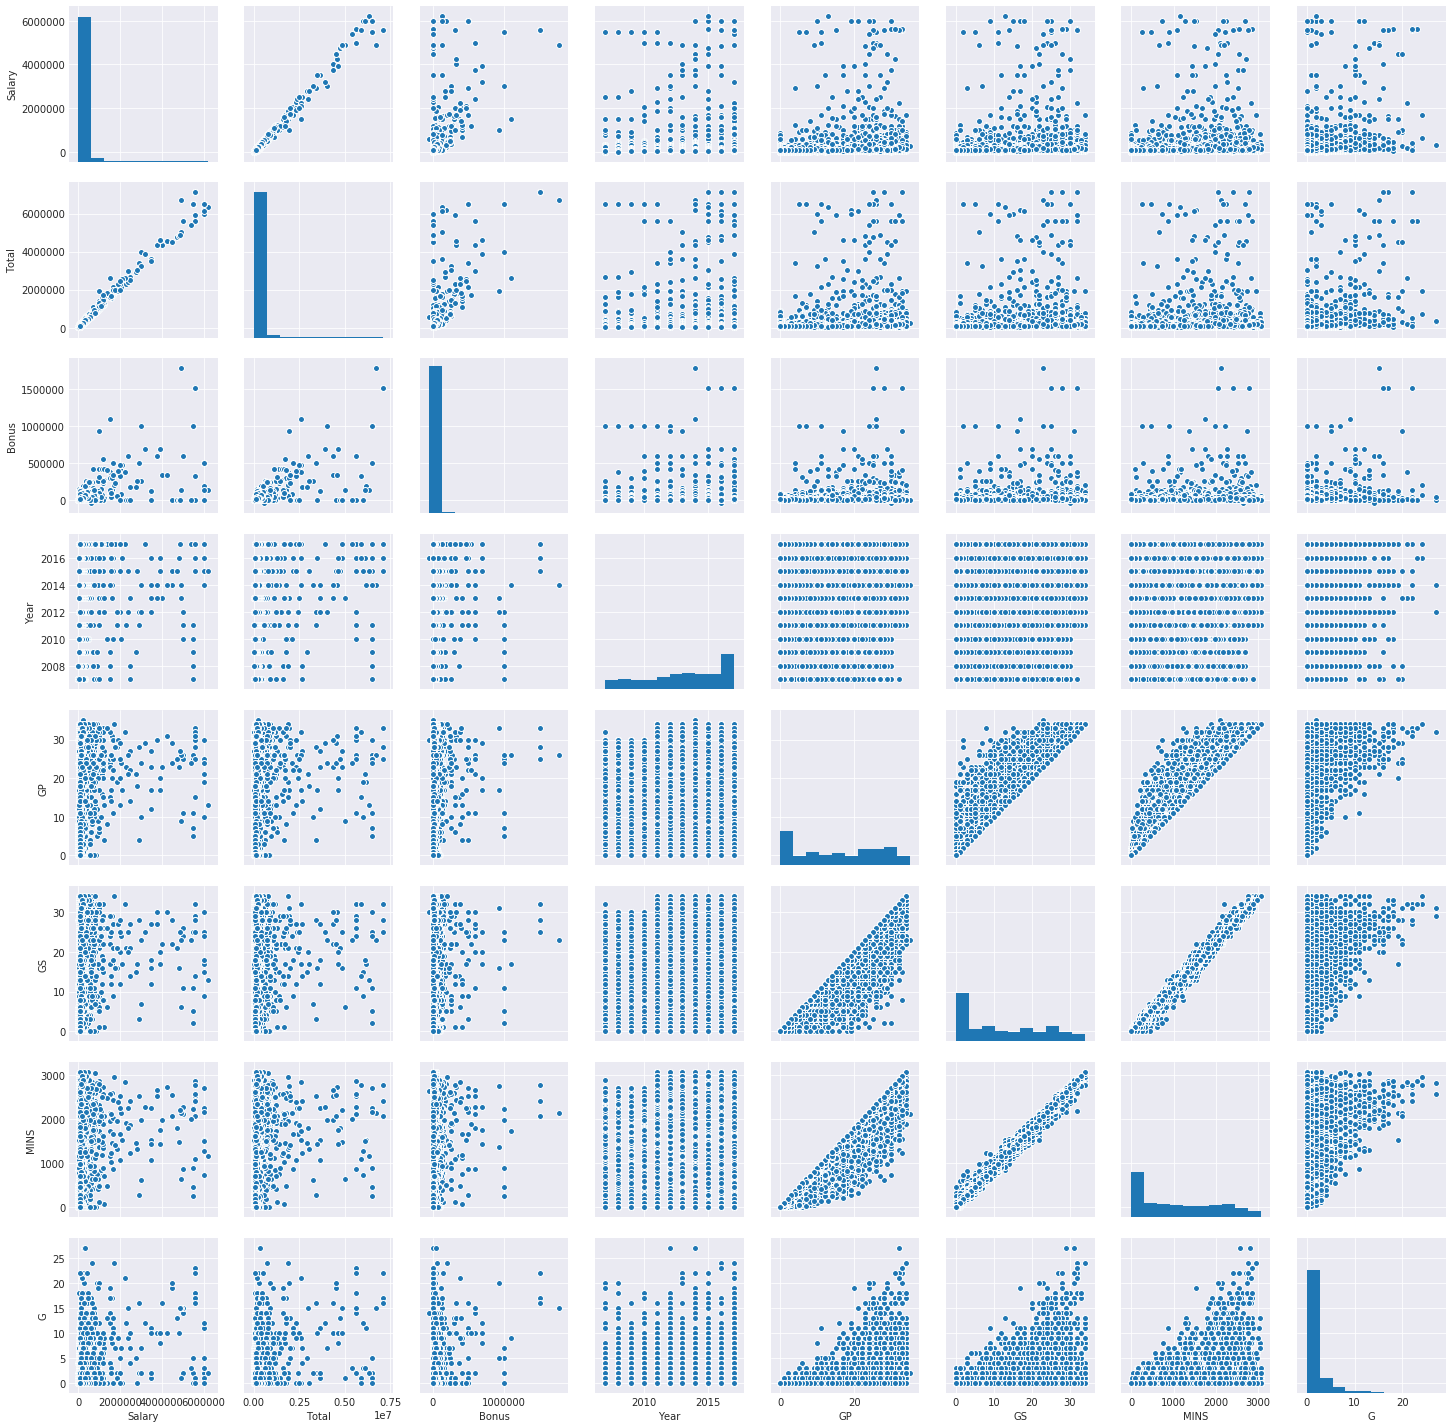

In [19]:
# Plot all of the variable-to-variable relations as scatterplots
cols = [0, 1] + list(np.arange(2, 10))
sns.pairplot(df.iloc[:, cols])

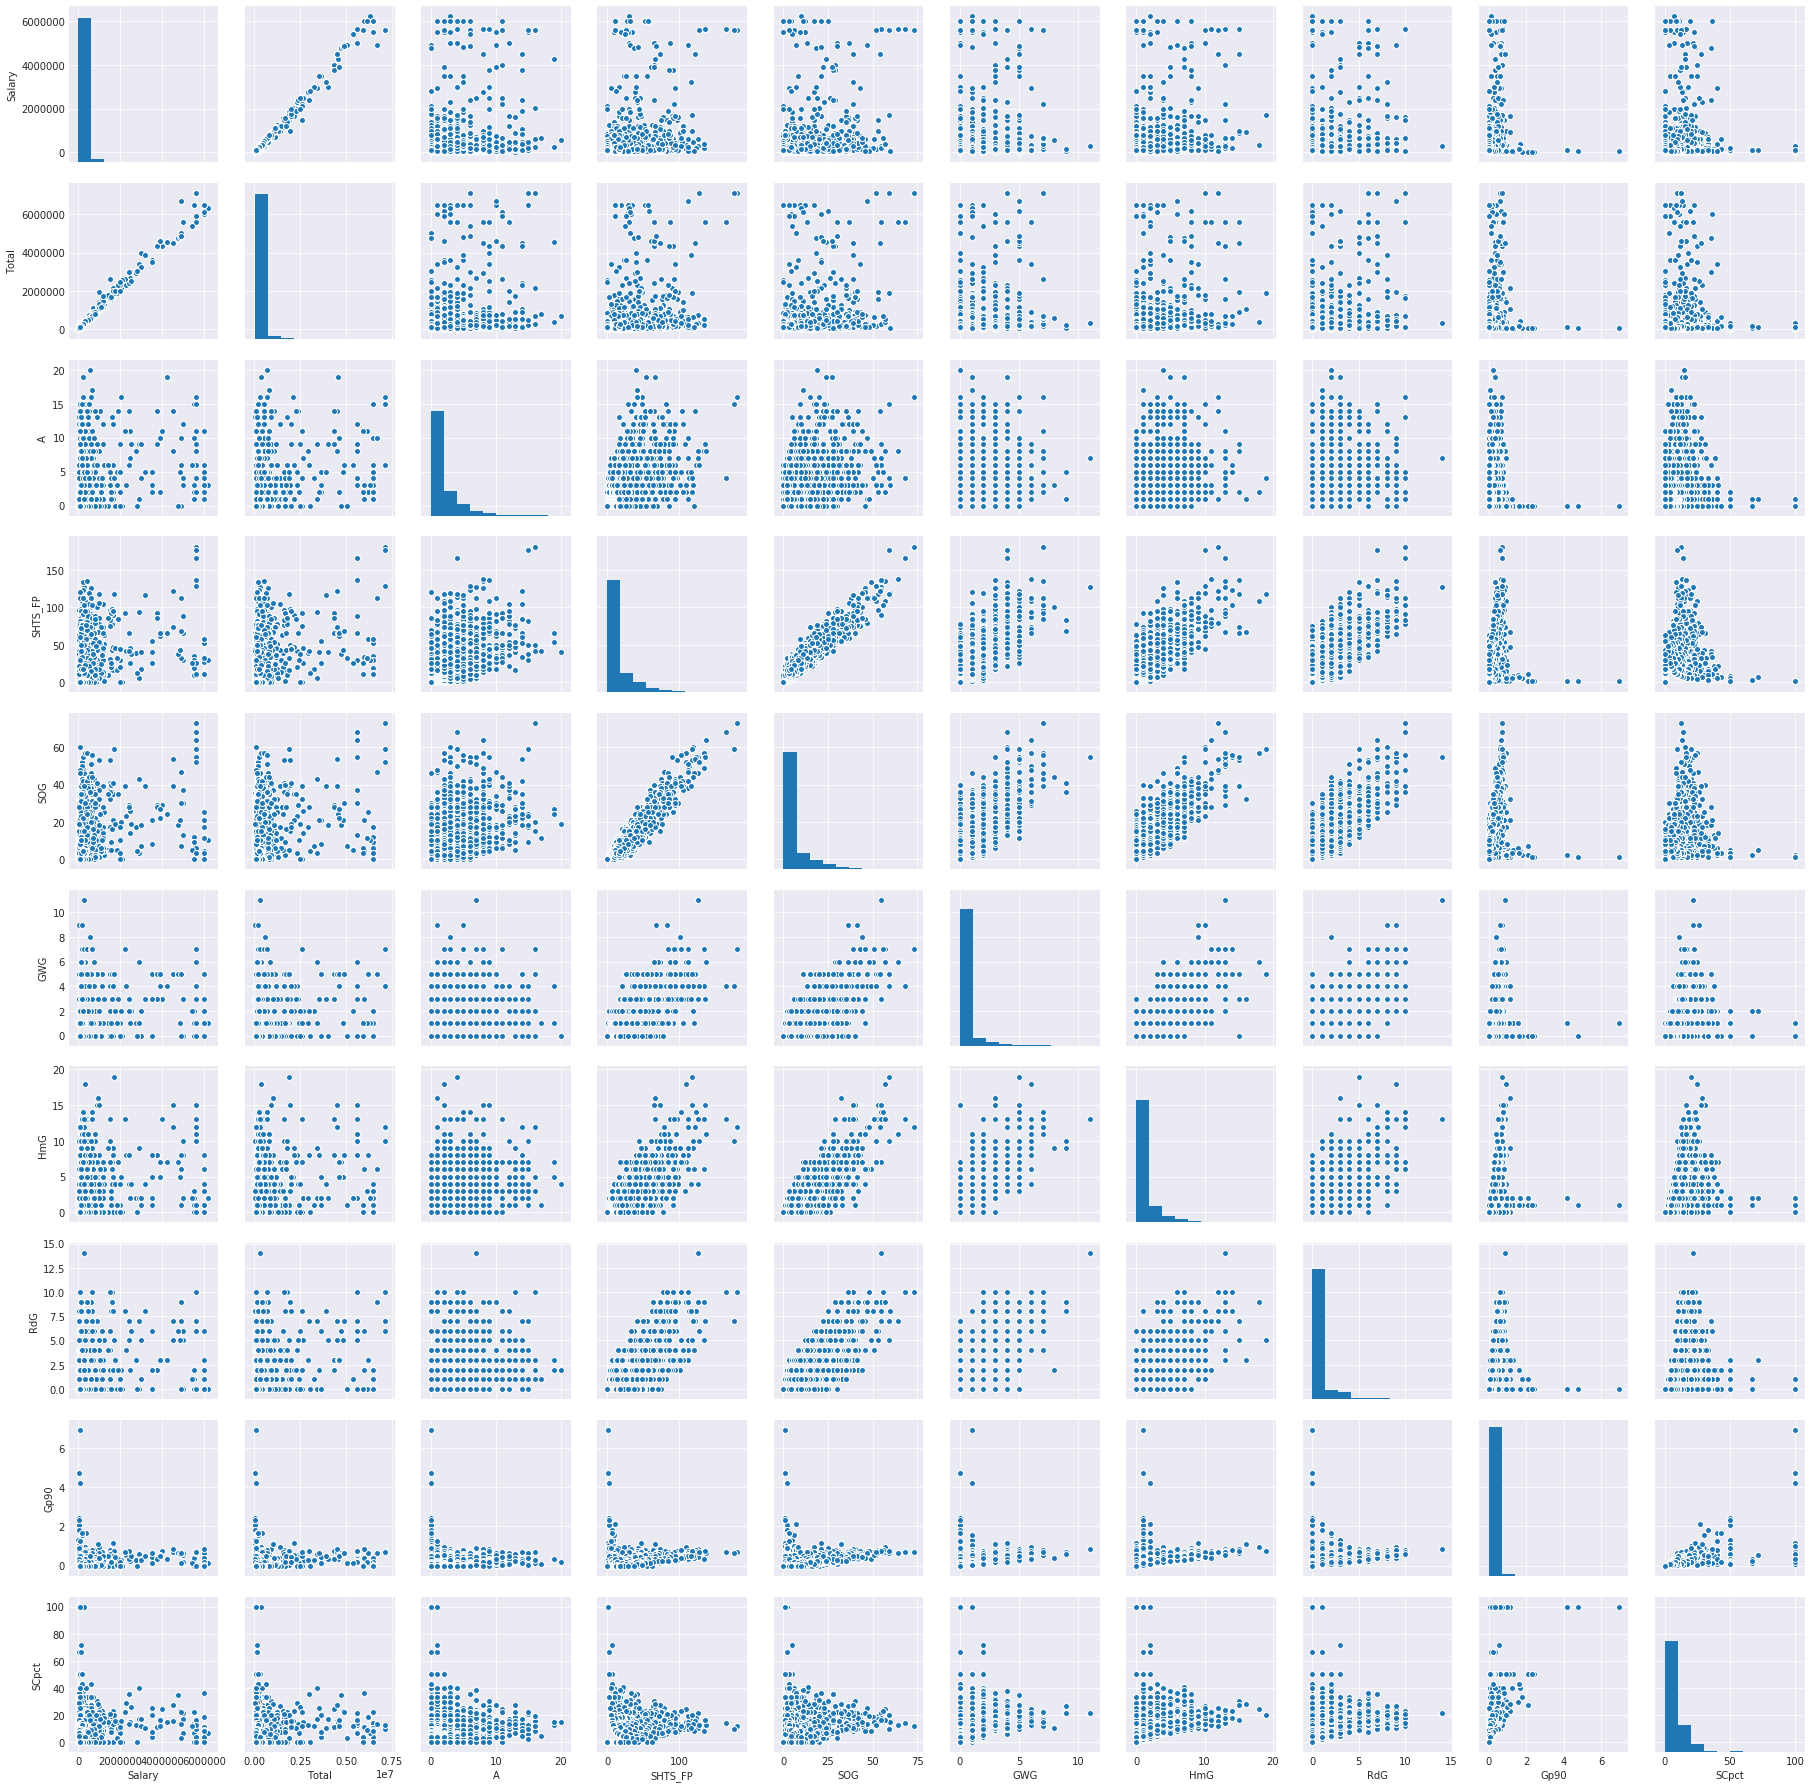

In [20]:
cols = [0, 1] + list(np.arange(10, 18))
sns.pairplot(df.iloc[:, cols])

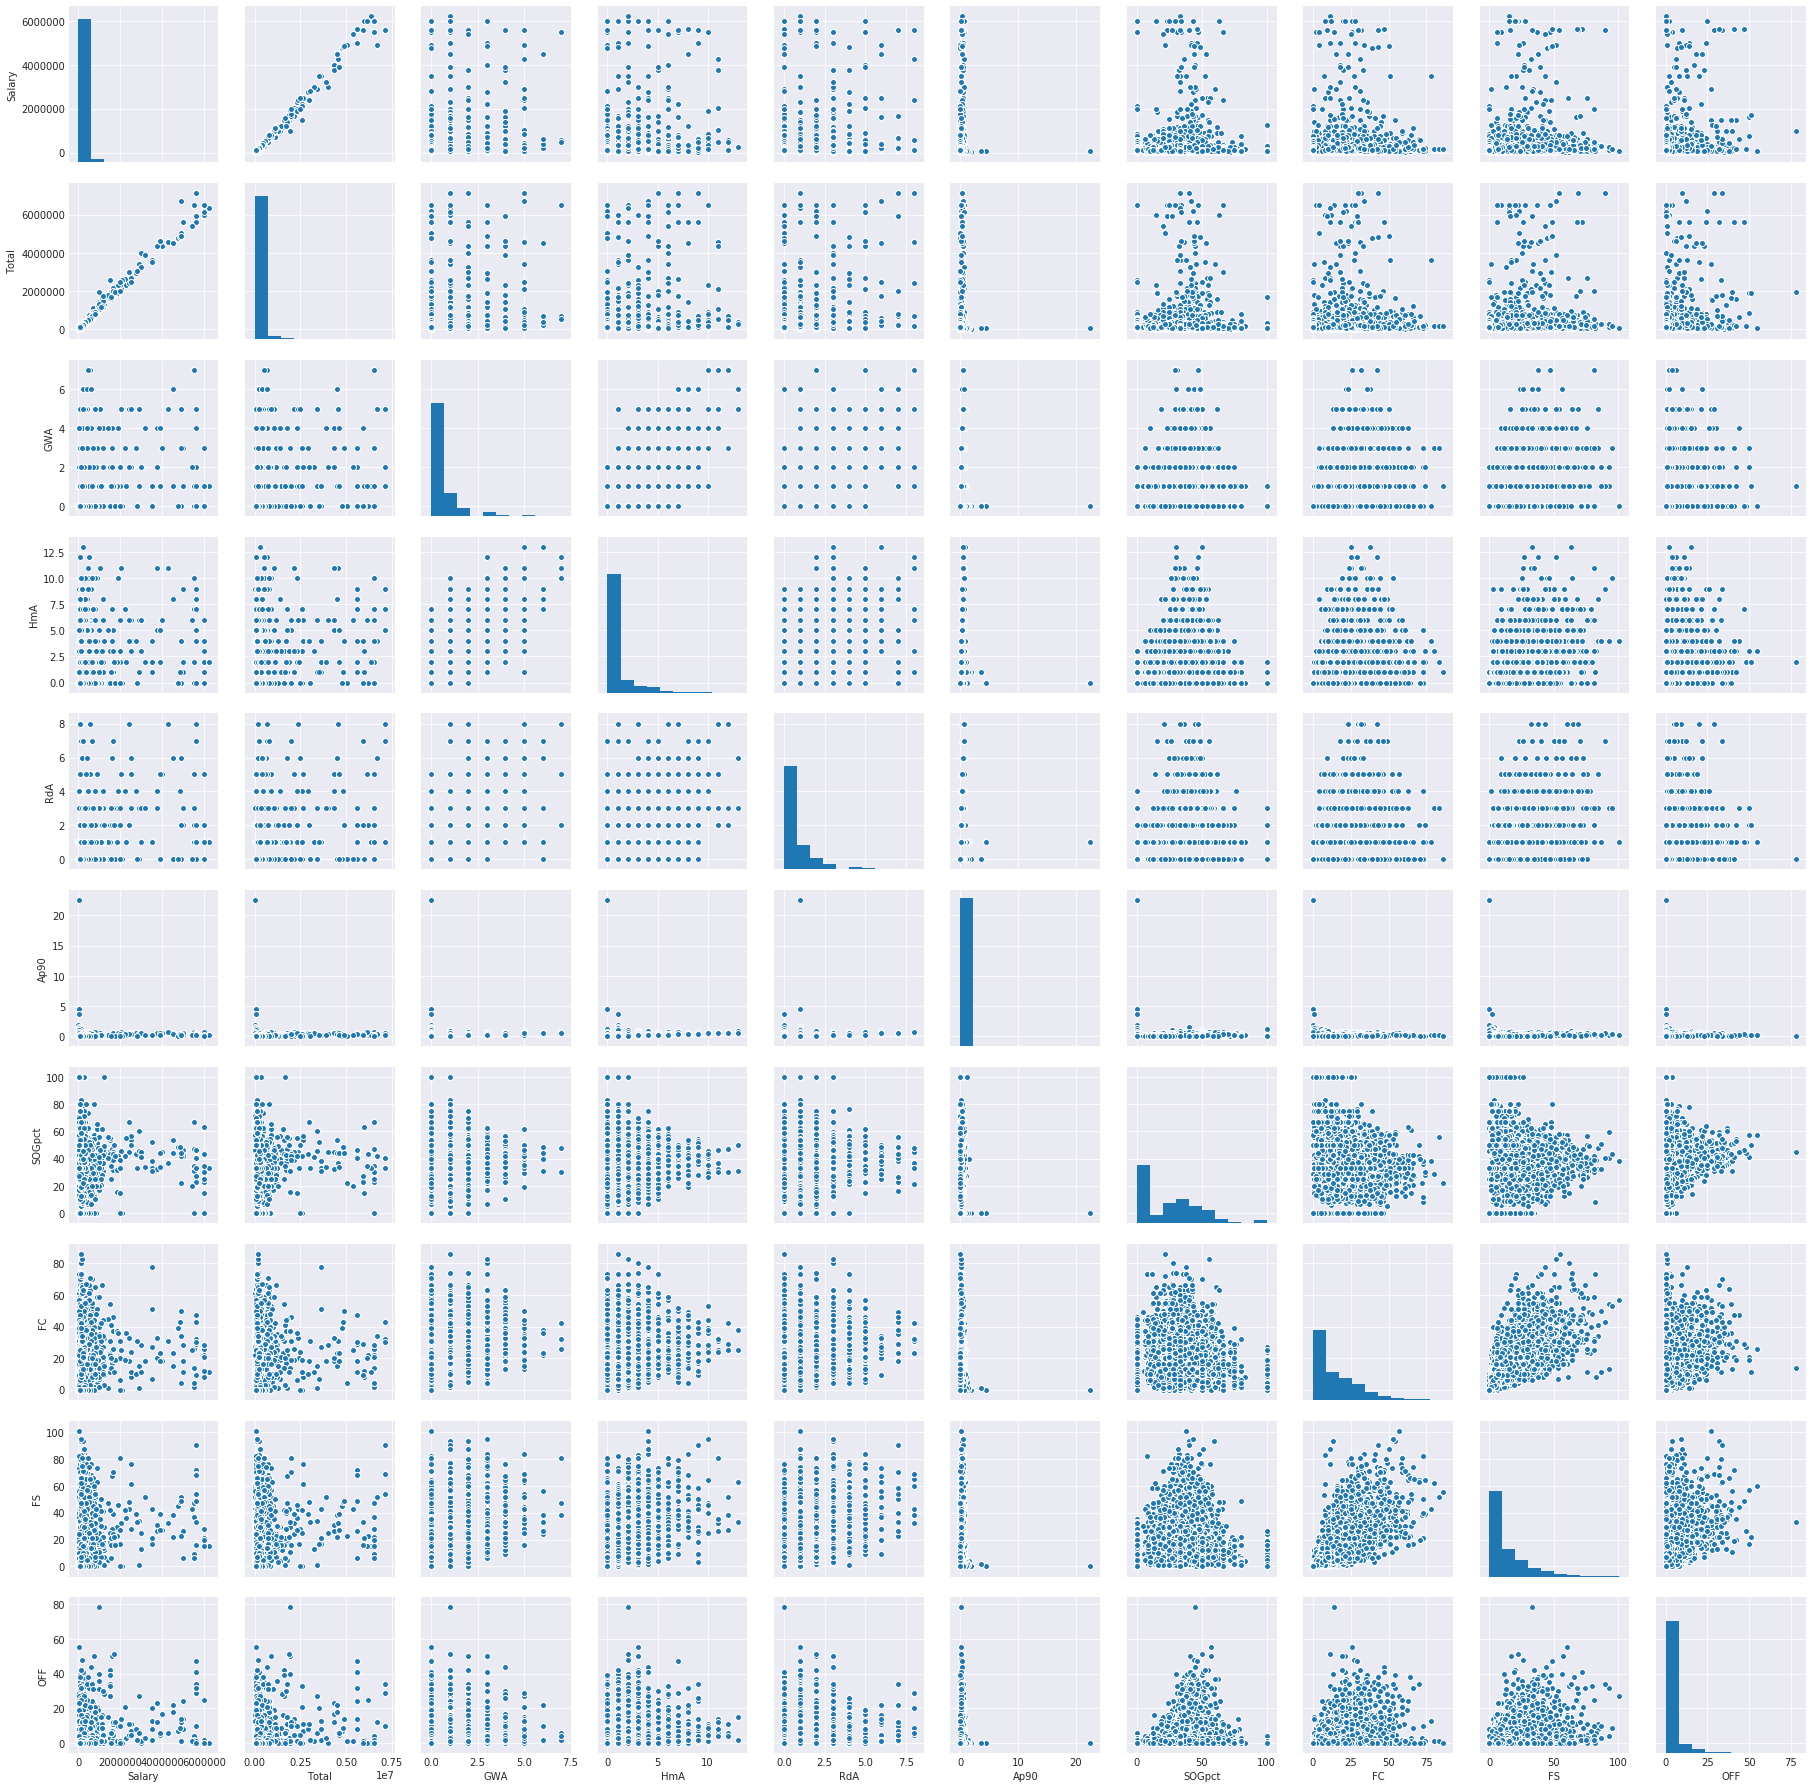

In [21]:
cols = [0, 1] + list(np.arange(18, 26))
sns.pairplot(df.iloc[:, cols])

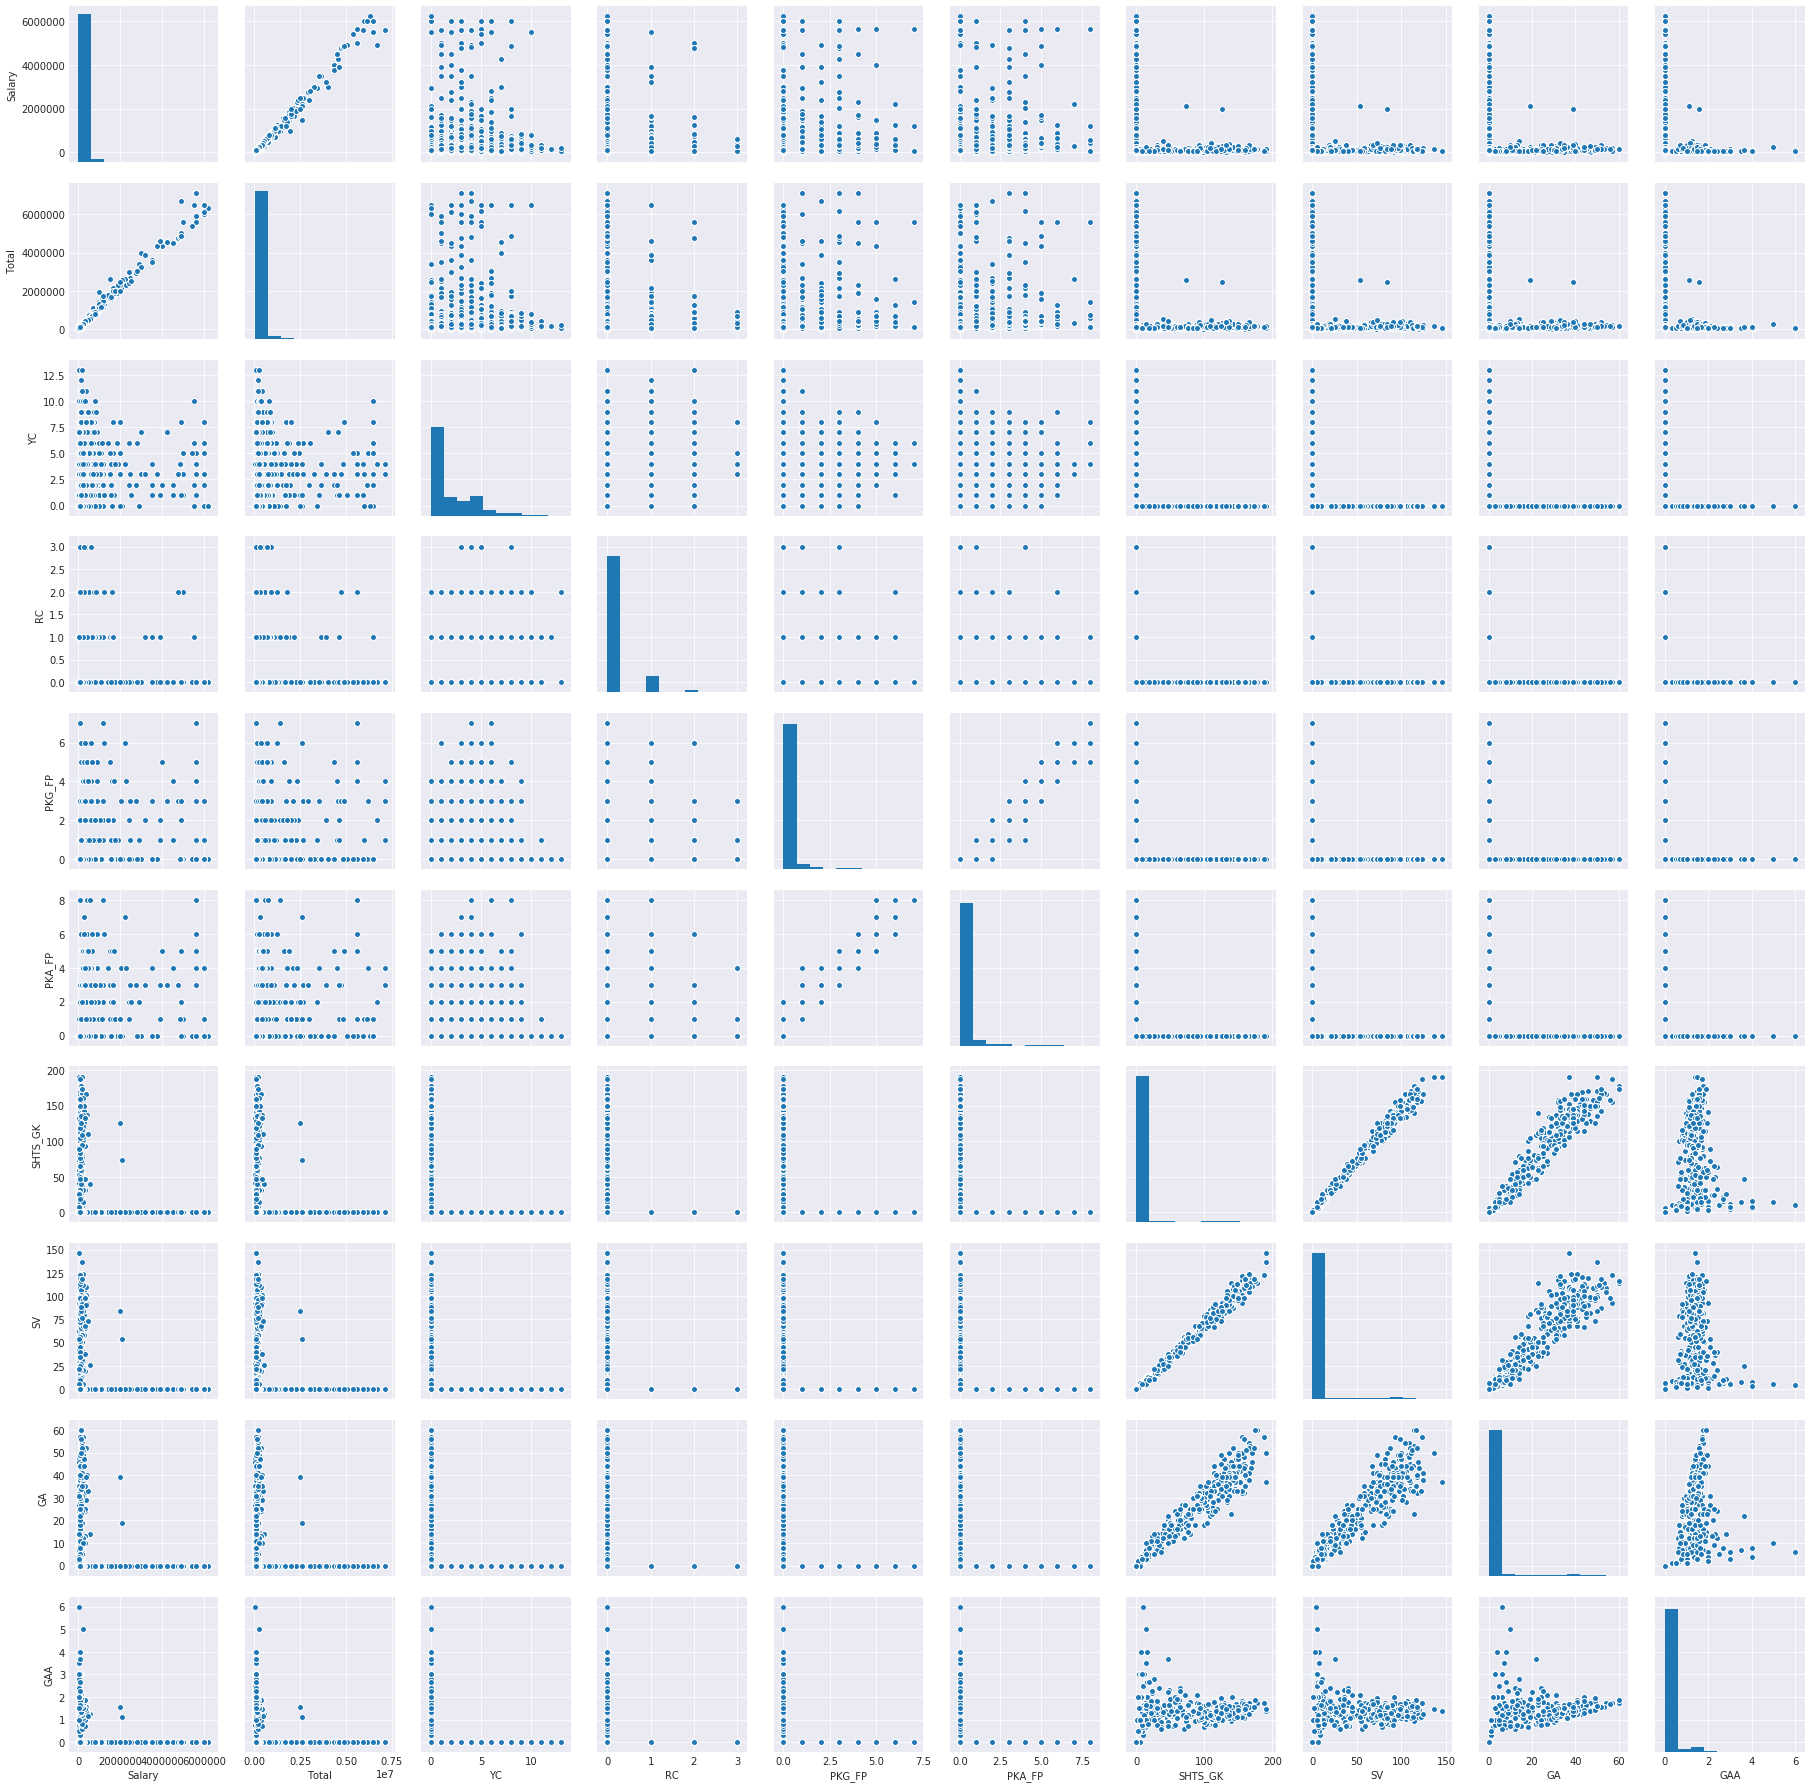

In [22]:
cols = [0, 1] + list(np.arange(26, 34))
sns.pairplot(df.iloc[:, cols])

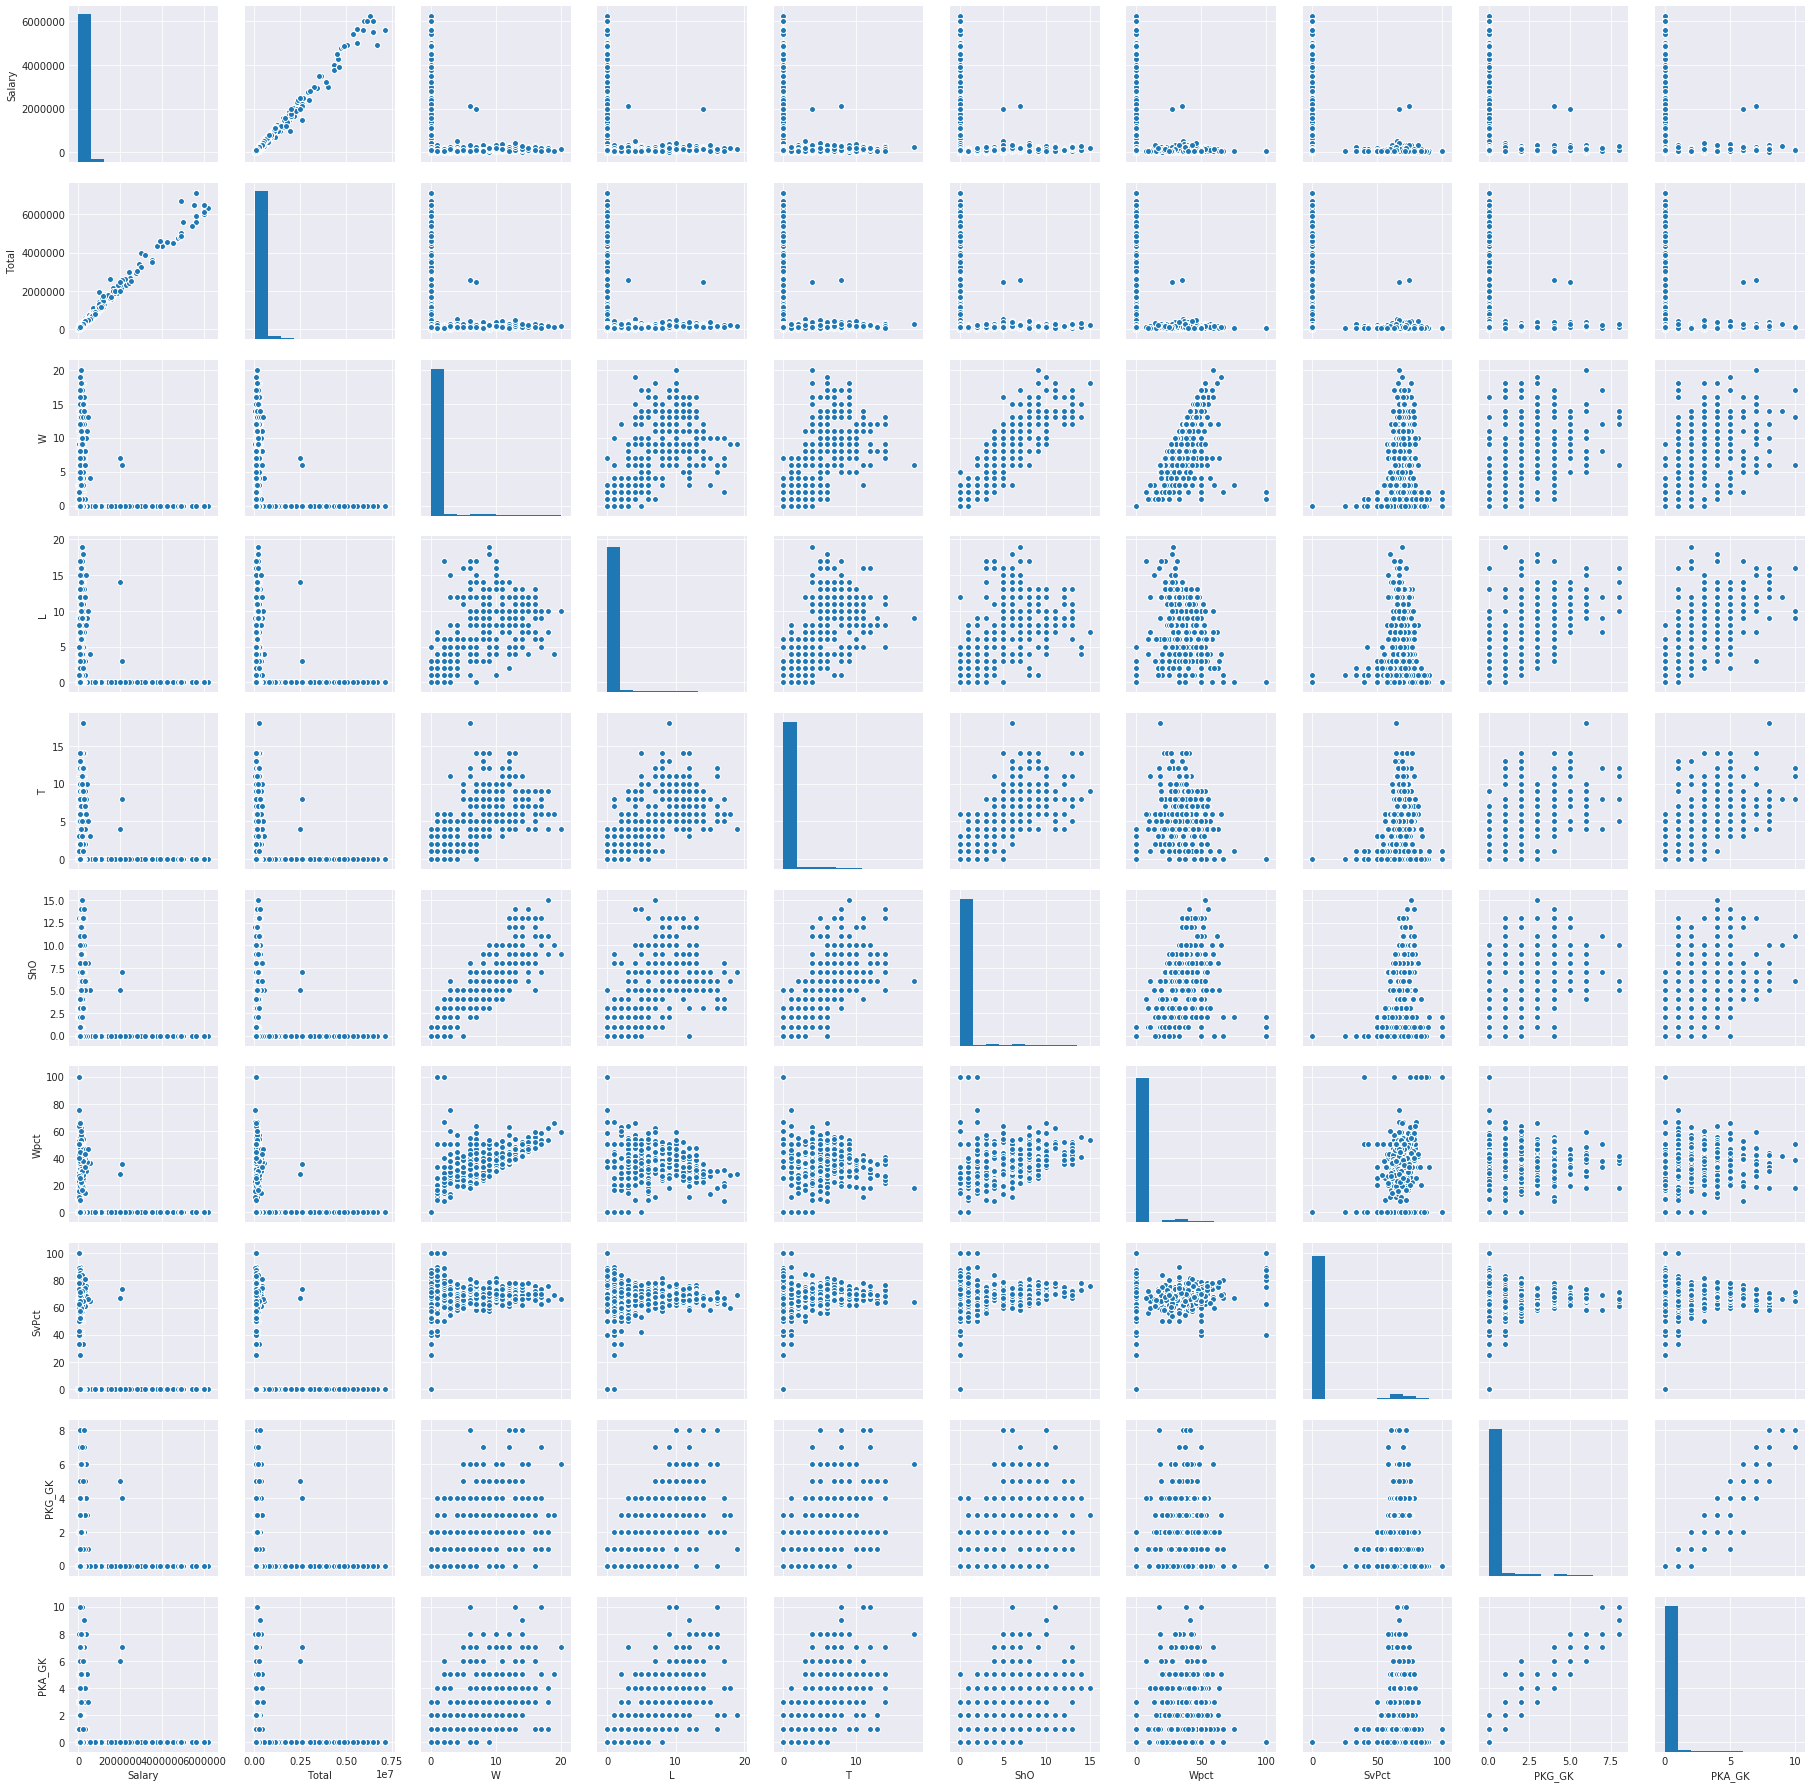

In [23]:
cols = [0, 1] + list(np.arange(34, df.shape[1]))
sns.pairplot(df.iloc[:, cols])

### Transform Features

In [229]:
# Make a copy of the dataframe to work on
df2 = df.copy()

In [230]:
# Apply log transform to money columns
df2.insert(0, 'Log_Salary', df2['Salary'].map(np.log))
df2 = df2.drop(columns=['Salary', 'Total', 'Bonus'], axis=1)

In [231]:
# df2['Log_G'] = df['G'].map(lambda x: np.log(x + 1))
# df2['Log_A'] = df['A'].map(lambda x: np.log(x + 1))

In [232]:
df2.head()

Log_Salary Club POS  Year  GP  GS  MINS   G  A  SHTS_FP  SOG  GWG  HmG  RdG  Gp90  SCpct  GWA  HmA  RdA  Ap90  SOGpct  FC  FS  OFF  YC  RC  PKG_FP  PKA_FP  SHTS_GK  SV  GA  GAA  W  L  T  ShO  Wpct  SvPct  PKG_GK  PKA_GK
0   12.487485   DC   F  2007  29  28  2410  20  1       79   47    4   12    8  0.75   25.3    1    1    0  0.04    59.5  35  39   21   2   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
1   14.220976   NY   F  2007  24  24  2125  19  5       97   53    5   13    6  0.80   19.6    2    3    2  0.21    54.6  31  20   42   2   1       5       5        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
2   12.691605   NE   F  2007  26  25  2283  16  3       90   55    5    7    9  0.63   17.8    1    2    1  0.12    61.1  13  41   21   2   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
3   13.527828   KC   F  2007  24  24  2149  15  6       75   43    6    8    7  0.63   20.0    2    3    3  0.25    57.3  21  57   50   6   0       1       1        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
4   11.191342  CHV   F  2007  28  24  2021  12  5       55   28    5    8    4  0.53   21.8    3    3    2  0.22    50.9  44  53   30   6   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0

In [233]:
corr2 = df2.corr()
corr2

Log_Salary      Year        GP        GS      MINS         G         A   SHTS_FP       SOG       GWG       HmG       RdG      Gp90     SCpct       GWA       HmA       RdA      Ap90    SOGpct        FC        FS       OFF        YC        RC    PKG_FP    PKA_FP   SHTS_GK        SV        GA       GAA         W         L         T       ShO      Wpct     SvPct    PKG_GK    PKA_GK
Log_Salary    1.000000  0.343093  0.459543  0.475438  0.472200  0.431803  0.411845  0.474294  0.438601  0.357287  0.422480  0.364065  0.231240  0.201278  0.323057  0.390603  0.332660  0.095941  0.214698  0.394353  0.448372  0.314369  0.338902  0.126501  0.312090  0.338603  0.063671  0.063310  0.064775 -0.012490  0.067491  0.062025  0.063996  0.068827  0.016260  0.000477  0.063534  0.067684
Year          0.343093  1.000000  0.036306  0.016887  0.018034  0.039855  0.038589  0.045913  0.003414  0.025445  0.047890  0.021102  0.021033 -0.016129  0.019836  0.046839  0.016179  0.021886 -0.093689  0.019417  0.019768 -0.033700  0.008636 -0.026251  0.021297  0.027924 -0.011368 -0.016175  0.004459  0.001666 -0.001280 -0.000727 -0.009246 -0.012759 -0.006349 -0.020616  0.012433  0.014580
GP            0.459543  0.036306  1.000000  0.934967  0.947053  0.461625  0.536612  0.596876  0.538748  0.387920  0.436634  0.410321  0.208497  0.281242  0.424599  0.490104  0.461005  0.099602  0.401233  0.736315  0.690390  0.372706  0.603477  0.209398  0.215837  0.231343  0.189555  0.190345  0.184134 -0.022275  0.191112  0.176960  0.185355  0.188830  0.057428  0.021583  0.167105  0.172438
GS            0.475438  0.016887  0.934967  1.000000  0.996343  0.427231  0.514054  0.545286  0.489966  0.366626  0.407002  0.375673  0.123527  0.213695  0.418037  0.476323  0.431639  0.065306  0.291012  0.716851  0.669098  0.310966  0.605363  0.218980  0.225636  0.242275  0.258875  0.259223  0.253343  0.046070  0.256927  0.244671  0.250862  0.254167  0.124474  0.099506  0.226883  0.233746
MINS          0.472200  0.018034  0.947053  0.996343  1.000000  0.425683  0.511054  0.544036  0.488458  0.364010  0.404750  0.375405  0.128741  0.218532  0.414849  0.472846  0.430141  0.066579  0.299566  0.717811  0.667373  0.309794  0.607716  0.211696  0.225301  0.242118  0.266354  0.266654  0.260774  0.049028  0.264185  0.251849  0.258203  0.261259  0.128532  0.103116  0.233797  0.240929
G             0.431803  0.039855  0.461625  0.427231  0.425683  1.000000  0.535917  0.872985  0.919648  0.828507  0.945559  0.889290  0.596831  0.484472  0.415460  0.498451  0.447260  0.120528  0.390903  0.460000  0.595002  0.741299  0.282239  0.061426  0.592507  0.617633 -0.110759 -0.109805 -0.111088 -0.128054 -0.104146 -0.108625 -0.104499 -0.103083 -0.116897 -0.139755 -0.096074 -0.098356
A             0.411845  0.038589  0.536612  0.514054  0.511054  0.535917  1.000000  0.644874  0.611055  0.466276  0.515369  0.464462  0.254890  0.230886  0.780498  0.927861  0.837831  0.285761  0.313690  0.497980  0.653708  0.394235  0.379193  0.080480  0.381007  0.405610 -0.132827 -0.131683 -0.133222 -0.153568 -0.124896 -0.130268 -0.125320 -0.123622 -0.140188 -0.167601 -0.115216 -0.117953
SHTS_FP       0.474294  0.045913  0.596876  0.545286  0.544036  0.872985  0.644874  1.000000  0.961907  0.726776  0.822702  0.780210  0.470206  0.320758  0.500136  0.594013  0.546648  0.146061  0.394017  0.603907  0.730605  0.727019  0.406908  0.105477  0.496512  0.533408 -0.152725 -0.151410 -0.153179 -0.176573 -0.143606 -0.149783 -0.144093 -0.142141 -0.161188 -0.192708 -0.132476 -0.135622
SOG           0.438601  0.003414  0.538748  0.489966  0.488458  0.919648  0.611055  0.961907  1.000000  0.764883  0.865189  0.824005  0.514196  0.368980  0.470801  0.563366  0.517242  0.140308  0.464968  0.534763  0.679775  0.764667  0.341574  0.080214  0.520147  0.554819 -0.135290 -0.134126 -0.135693 -0.156416 -0.127212 -0.132684 -0.127644 -0.125915 -0.142787 -0.170709 -0.117353 -0.120140
GWG           0.357287  0.025445  0.387920  0.366626  0.364010  0.828507  0.466276

In [234]:
corr2['Log_Salary'].sort_values(ascending=False)

Log_Salary    1.000000
GS            0.475438
SHTS_FP       0.474294
MINS          0.472200
GP            0.459543
FS            0.448372
SOG           0.438601
G             0.431803
HmG           0.422480
A             0.411845
FC            0.394353
HmA           0.390603
RdG           0.364065
GWG           0.357287
Year          0.343093
YC            0.338902
PKA_FP        0.338603
RdA           0.332660
GWA           0.323057
OFF           0.314369
PKG_FP        0.312090
Gp90          0.231240
SOGpct        0.214698
SCpct         0.201278
RC            0.126501
Ap90          0.095941
ShO           0.068827
PKA_GK        0.067684
W             0.067491
GA            0.064775
T             0.063996
SHTS_GK       0.063671
PKG_GK        0.063534
SV            0.063310
L             0.062025
Wpct          0.016260
SvPct         0.000477
GAA          -0.012490
Name: Log_Salary, dtype: float64

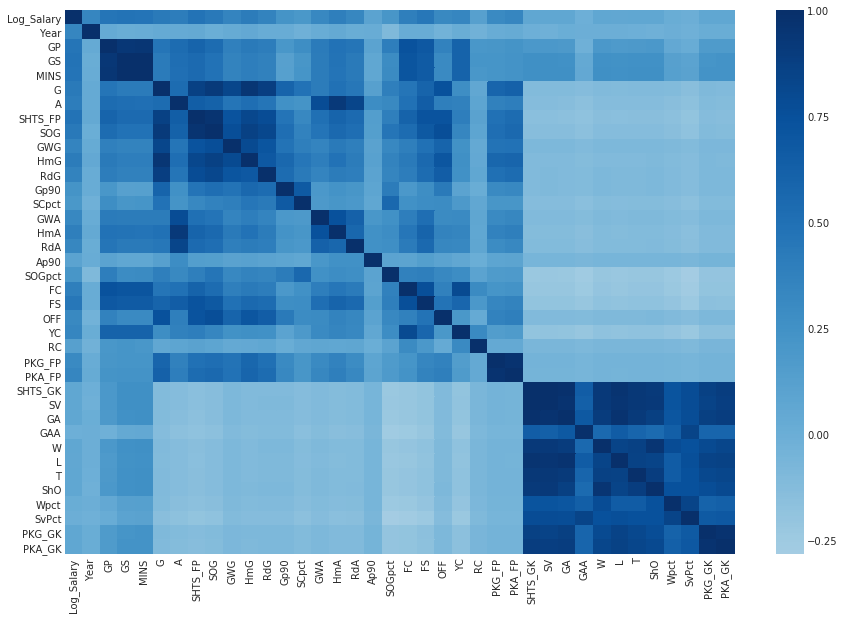

In [235]:
plt.figure(num=None, figsize=(15, 10))
sns.heatmap(corr2, center=0, cmap='Blues')

In [236]:
df3 = df2.join(dummy_df)

In [237]:
corr3 = df3.corr()
corr3

Log_Salary      Year        GP        GS      MINS         G         A   SHTS_FP       SOG       GWG       HmG       RdG      Gp90     SCpct       GWA       HmA       RdA      Ap90    SOGpct        FC        FS       OFF        YC        RC    PKG_FP    PKA_FP   SHTS_GK        SV        GA       GAA         W         L         T       ShO      Wpct     SvPct    PKG_GK    PKA_GK  Intercept  POS[T.D-M]  POS[T.F]  POS[T.F-M]  POS[T.GK]  POS[T.M]  POS[T.M-D]  POS[T.M-F]  Club[T.CHI]  Club[T.CHV]  Club[T.CLB]  Club[T.COL]  Club[T.DAL]  Club[T.DC]  Club[T.HOU]  Club[T.KC]  Club[T.LA]  Club[T.MIN]  Club[T.MTL]  Club[T.NE]  Club[T.NY]  Club[T.NYCFC]  Club[T.ORL]  Club[T.PHI]  Club[T.POR]  Club[T.RSL]  Club[T.SEA]  Club[T.SJ]  Club[T.TOR]  Club[T.UNK]  Club[T.VAN]
Log_Salary       1.000000  0.343093  0.459543  0.475438  0.472200  0.431803  0.411845  0.474294  0.438601  0.357287  0.422480  0.364065  0.231240  0.201278  0.323057  0.390603  0.332660  0.095941  0.214698  0.394353  0.448372  0.314369  0.338902  0.126501  0.312090  0.338603  0.063671  0.063310  0.064775 -0.012490  0.067491  0.062025  0.063996  0.068827  0.016260  0.000477  0.063534  0.067684        NaN   -0.020837  0.093838   -0.007916  -0.096427  0.084484   -0.041921    0.030722    -0.002583    -0.068938    -0.034079    -0.029208    -0.033818   -0.028521    -0.000674   -0.026298    0.040472     0.039968     0.036545   -0.028351    0.001939       0.070934     0.038378     0.017324     0.039514    -0.012266     0.014376   -0.008447     0.026386    -0.049201     0.037017
Year             0.343093  1.000000  0.036306  0.016887  0.018034  0.039855  0.038589  0.045913  0.003414  0.025445  0.047890  0.021102  0.021033 -0.016129  0.019836  0.046839  0.016179  0.021886 -0.093689  0.019417  0.019768 -0.033700  0.008636 -0.026251  0.021297  0.027924 -0.011368 -0.016175  0.004459  0.001666 -0.001280 -0.000727 -0.009246 -0.012759 -0.006349 -0.020616  0.012433  0.014580        NaN   -0.007588 -0.009853   -0.003012  -0.013919  0.029196    0.014866    0.033703    -0.034948    -0.140627    -0.044223    -0.050995    -0.029140   -0.028724    -0.031472   -0.035244   -0.048128     0.106994     0.113849   -0.045363   -0.043300       0.137936     0.142135     0.074468     0.095780    -0.041919     0.037714    0.000626    -0.019634    -0.023902     0.093815
GP               0.459543  0.036306  1.000000  0.934967  0.947053  0.461625  0.536612  0.596876  0.538748  0.387920  0.436634  0.410321  0.208497  0.281242  0.424599  0.490104  0.461005  0.099602  0.401233  0.736315  0.690390  0.372706  0.603477  0.209398  0.215837  0.231343  0.189555  0.190345  0.184134 -0.022275  0.191112  0.176960  0.185355  0.188830  0.057428  0.021583  0.167105  0.172438        NaN    0.011856  0.011995   -0.003614  -0.148981  0.089978   -0.021142    0.044652     0.005893    -0.009367    -0.006434     0.005357    -0.015595   -0.004867     0.019569    0.002313   -0.007965     0.004442    -0.000609    0.008870    0.004681       0.008221    -0.006784     0.016701     0.005657     0.012196    -0.003945    0.004176    -0.000506    -0.089300    -0.008442
GS               0.475438  0.016887  0.934967  1.000000  0.996343  0.427231  0.514054  0.545286  0.489966  0.366626  0.407002  0.375673  0.123527  0.213695  0.418037  0.476323  0.431639  0.065306  0.291012  0.716851  0.669098  0.310966  0.605363  0.218980  0.225636  0.242275  0.258875  0.259223  0.253343  0.046070  0.256927  0.244671  0.250862  0.254167  0.124474  0.099506  0.226883  0.233746        NaN    0.019545 -0.091946   -0.013424  -0.055577  0.037915   -0.022738    0.014896     0.005955    -0.006641    -0.002998     0.006695    -0.015100   -0.004804     0.012609    0.007038   -0.007884     0.004810    -0.004194    0.009236    0.009616       0.006354    -0.006955     0.003823     0.005227     0.008653    -0.003994    0.003818     0.003009    -0.075645    -0.007662
MINS             0.472200  0.018034  0.947053  0.996343  1.000000  0.425683  0.511054  0.544036  0.488458  0.3

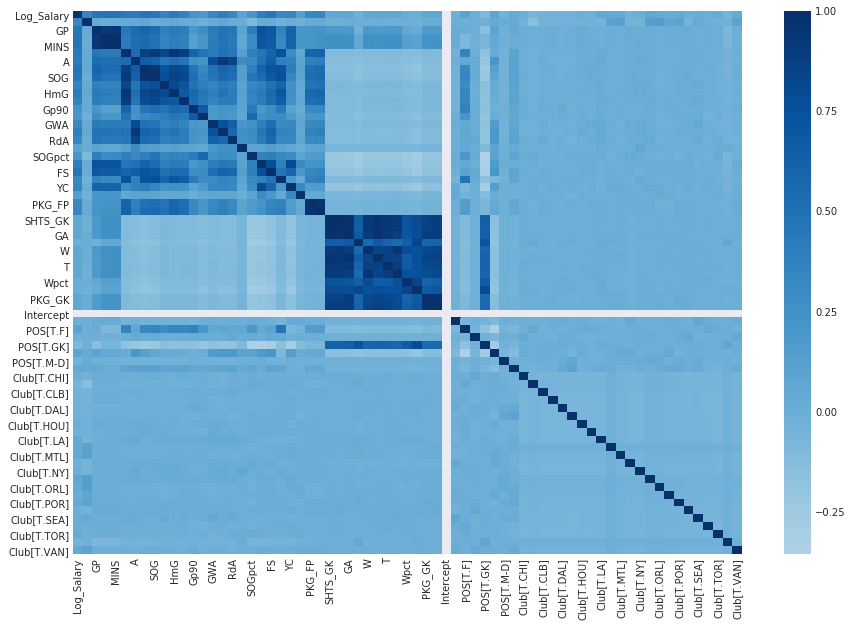

In [238]:
plt.figure(num=None, figsize=(15, 10))
sns.heatmap(corr3, center=0, cmap='Blues') #sns.diverging_palette(10, 220, sep=80, n=7))

## Modeling

In [239]:
df2.head()

Log_Salary Club POS  Year  GP  GS  MINS   G  A  SHTS_FP  SOG  GWG  HmG  RdG  Gp90  SCpct  GWA  HmA  RdA  Ap90  SOGpct  FC  FS  OFF  YC  RC  PKG_FP  PKA_FP  SHTS_GK  SV  GA  GAA  W  L  T  ShO  Wpct  SvPct  PKG_GK  PKA_GK
0   12.487485   DC   F  2007  29  28  2410  20  1       79   47    4   12    8  0.75   25.3    1    1    0  0.04    59.5  35  39   21   2   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
1   14.220976   NY   F  2007  24  24  2125  19  5       97   53    5   13    6  0.80   19.6    2    3    2  0.21    54.6  31  20   42   2   1       5       5        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
2   12.691605   NE   F  2007  26  25  2283  16  3       90   55    5    7    9  0.63   17.8    1    2    1  0.12    61.1  13  41   21   2   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
3   13.527828   KC   F  2007  24  24  2149  15  6       75   43    6    8    7  0.63   20.0    2    3    3  0.25    57.3  21  57   50   6   0       1       1        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0
4   11.191342  CHV   F  2007  28  24  2021  12  5       55   28    5    8    4  0.53   21.8    3    3    2  0.22    50.9  44  53   30   6   0       0       0        0   0   0  0.0  0  0  0    0   0.0    0.0       0       0

In [240]:
cols2 = corr2['Log_Salary'][1:].map(np.abs).sort_values(ascending=False)
cols2

GS         0.475438
SHTS_FP    0.474294
MINS       0.472200
GP         0.459543
FS         0.448372
SOG        0.438601
G          0.431803
HmG        0.422480
A          0.411845
FC         0.394353
HmA        0.390603
RdG        0.364065
GWG        0.357287
Year       0.343093
YC         0.338902
PKA_FP     0.338603
RdA        0.332660
GWA        0.323057
OFF        0.314369
PKG_FP     0.312090
Gp90       0.231240
SOGpct     0.214698
SCpct      0.201278
RC         0.126501
Ap90       0.095941
ShO        0.068827
PKA_GK     0.067684
W          0.067491
GA         0.064775
T          0.063996
SHTS_GK    0.063671
PKG_GK     0.063534
SV         0.063310
L          0.062025
Wpct       0.016260
GAA        0.012490
SvPct      0.000477
Name: Log_Salary, dtype: float64

In [241]:
# Setup the data
X2 = df2[cols[cols > 0.2].index]
y2 = df2['Log_Salary']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=129)

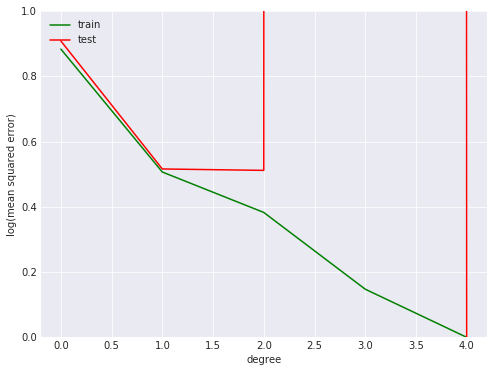

In [244]:
from sklearn.metrics import mean_squared_error

# Step through degrees from 0 to 5 and store the training and test (generalization) error.
deg_max = 4
train_error = np.empty(deg_max+1)
test_error = np.empty(deg_max+1)
for degree in range(deg_max):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train2, y_train2)
    train_error[degree] = mean_squared_error(y_train2, est.predict(X_train2))
    test_error[degree] = mean_squared_error(y_test2, est.predict(X_test2))
    
# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(deg_max+1), train_error, color='green', label='train')
plt.plot(np.arange(deg_max+1), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left')

In [245]:
# Polynomial Model
est2_2deg = make_pipeline(PolynomialFeatures(2), LinearRegression())
est2_2deg.fit(X_train2, y_train2)
est2_2deg.score(X_test2, y_test2)

0.43663416911410668

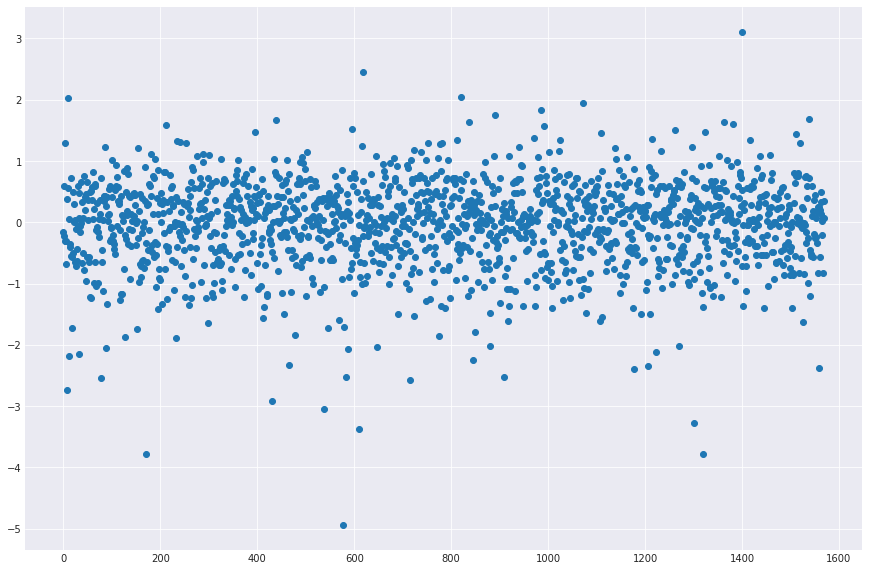

In [246]:
y_pred2 = est2_2deg.predict(X_test2)
y_error2 = y_pred2 - y_test2

# Plot residuals
plt.figure(num=None, figsize=(15, 10))
plt.scatter(np.arange(len(y_error2)), y_error2)

In [247]:
# Linear Model
est2_1deg = make_pipeline(PolynomialFeatures(1), LinearRegression())
est2_1deg.fit(X_train2, y_train2)
est2_1deg.score(X_test2, y_test2)

0.43187605675123525

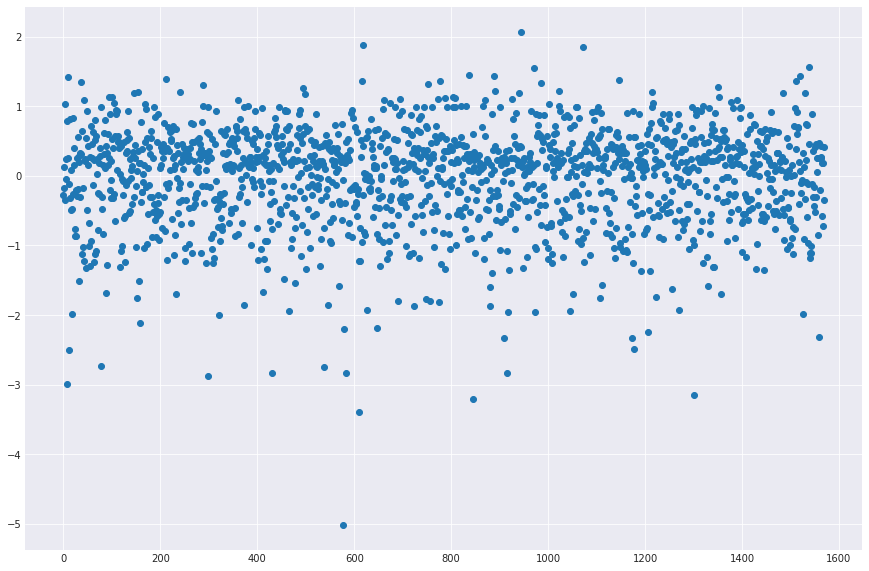

In [248]:
y_pred2 = est2_1deg.predict(X_test2)
y_error2 = y_pred2 - y_test2

# Plot residuals
plt.figure(num=None, figsize=(15, 10))
plt.scatter(np.arange(len(y_error2)), y_error2)

In [256]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [282]:
# 
alphas = np.logspace(-9, 9, num=19)
rscores = np.zeros(len(alphas))
lscores = np.zeros(len(alphas))
escores = np.zeros(len(alphas))
for ii, a in enumerate(alphas):    
    # RidgeCV
    rcv = RidgeCV(cv=10, alphas=[a], fit_intercept=True)
    rcv.fit(X2, y2)
    rscores[ii] = rcv.score(X2, y2)
    # LassoCV
    lcv = LassoCV(cv=10, alphas=[a], fit_intercept=True)
    lcv.fit(X2, y2)
    lscores[ii] = lcv.score(X2, y2)    
    # ElasticNetCV
    ecv = ElasticNetCV(cv=10, alphas=[a], l1_ratio=0.5, fit_intercept=True)
    ecv.fit(X2, y2)
    escores[ii] = ecv.score(X2, y2)

/home/cneiderer/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.1884572207390863e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2298339936735274e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.20812082550616e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-c

/home/cneiderer/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3384646107682253e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.012927034060732e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: O

In [285]:
np.array([alphas, rscores, lscores, escores]).T

array([[  1.00000000e-09,   4.29337842e-01,   4.29337841e-01,
          4.29337841e-01],
       [  1.00000000e-08,   4.29337842e-01,   4.29337841e-01,
          4.29337841e-01],
       [  1.00000000e-07,   4.29337842e-01,   4.29337841e-01,
          4.29337841e-01],
       [  1.00000000e-06,   4.29337842e-01,   4.29337841e-01,
          4.29337841e-01],
       [  1.00000000e-05,   4.29337842e-01,   4.29337818e-01,
          4.29337833e-01],
       [  1.00000000e-04,   4.29337842e-01,   4.29335414e-01,
          4.29336945e-01],
       [  1.00000000e-03,   4.29337842e-01,   4.29093954e-01,
          4.29252866e-01],
       [  1.00000000e-02,   4.29337842e-01,   4.26505373e-01,
          4.27088474e-01],
       [  1.00000000e-01,   4.29337838e-01,   4.03549061e-01,
          4.12923972e-01],
       [  1.00000000e+00,   4.29337396e-01,   2.86341633e-01,
          3.62437685e-01],
       [  1.00000000e+01,   4.29302208e-01,   2.22845394e-01,
          2.22941198e-01],
       [  1.00000000e

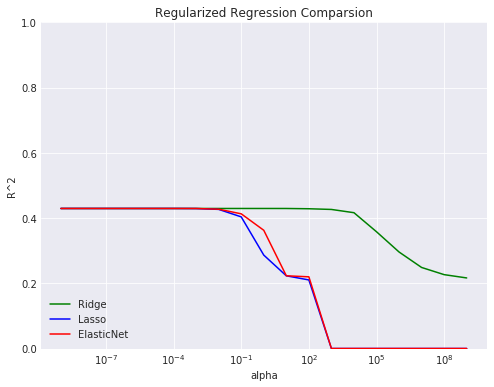

In [287]:
# Plot the alpha vs. scores
plt.figure(figsize=(8,6))
plt.semilogx(alphas, rscores, color='g', label='Ridge')
plt.semilogx(alphas, lscores, color='b', label='Lasso')
plt.semilogx(alphas, escores, color='r', label='ElasticNet')
plt.ylim((0.0, 1e0))
plt.ylabel('R^2')
plt.xlabel('alpha')
plt.title('Regularized Regression Comparsion')
plt.legend(loc='lower left')

In [173]:
cols3 = corr3['Log_Salary'][1:].map(np.abs).sort_values(ascending=False)
cols3

GS               0.475438
SHTS_FP          0.474294
MINS             0.472200
GP               0.459543
FS               0.448372
SOG              0.438601
G                0.431803
HmG              0.422480
A                0.411845
FC               0.394353
HmA              0.390603
RdG              0.364065
GWG              0.357287
Year             0.343093
YC               0.338902
PKA_FP           0.338603
RdA              0.332660
GWA              0.323057
OFF              0.314369
PKG_FP           0.312090
Gp90             0.231240
SOGpct           0.214698
SCpct            0.201278
RC               0.126501
POS[T.GK]        0.096427
Ap90             0.095941
POS[T.F]         0.093838
POS[T.M]         0.084484
Club[T.NYCFC]    0.070934
Club[T.CHV]      0.068938
ShO              0.068827
PKA_GK           0.067684
W                0.067491
GA               0.064775
T                0.063996
SHTS_GK          0.063671
PKG_GK           0.063534
SV               0.063310
L           

In [249]:
# Choose the predictor variables, here all but the first which is the response variable
X3 = df3[cols3[cols3 > 0.2].index]
y3 = df3['Log_Salary']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=129)

In [250]:
# Polynomial Model
est3 = make_pipeline(PolynomialFeatures(2), LinearRegression())
est3.fit(X_train3, y_train3)
est3.score(X_test3, y_test3)

0.43663416911410668

In [251]:
y_pred3 = est.predict(X_test3)
y_error3 = y_pred3 - y_test3

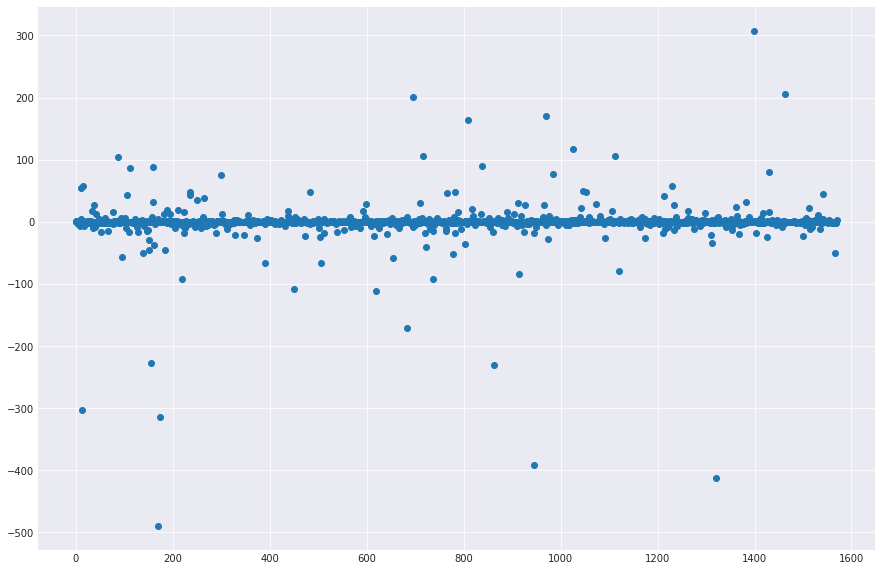

In [252]:
# Plot residuals
plt.figure(num=None, figsize=(15, 10))
plt.scatter(np.arange(len(y_error3)), y_error3)

In [253]:
# Linear Model
est3 = make_pipeline(PolynomialFeatures(1), LinearRegression())
est3.fit(X_train3, y_train3)
est3.score(X_test3, y_test3)

0.43187605675123525

In [254]:
y_pred3 = est.predict(X_test3)
y_error3 = y_pred3 - y_test3

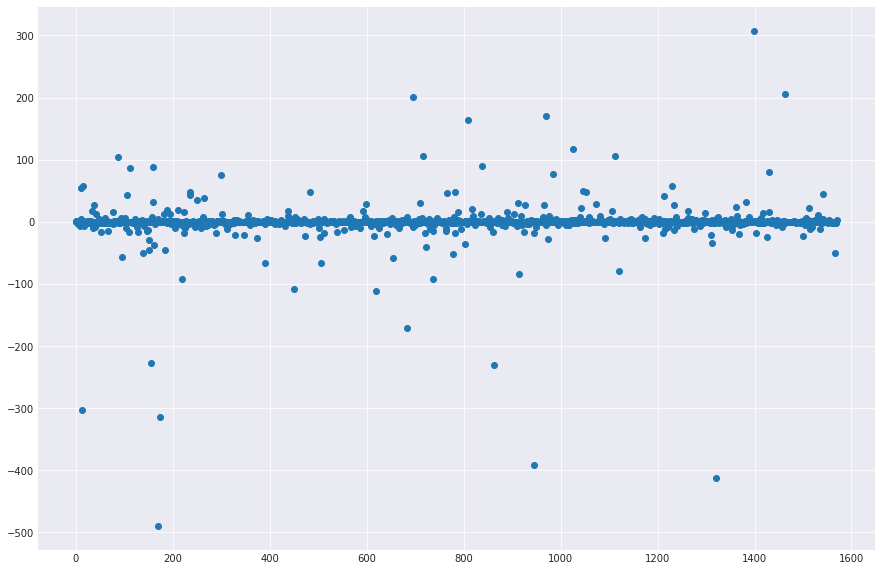

In [255]:
# Plot residuals
plt.figure(num=None, figsize=(15, 10))
plt.scatter(np.arange(len(y_error3)), y_error3)

## Predicting Linear Salary

### Base Dataset

In [199]:
# Create an empty model
lr1 = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
X = df.iloc[:, 5:]
# Choose the response variable(s)
y = df.iloc[:, 0]
# Fit the model to the full dataset
lr1.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr1.score(X,y)

0.20574112153724955

### With Club Transformed

In [202]:
df_2 = df.join(dummy_club)

In [203]:
# Create an empty model
lr2 = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
X2 = df_2.iloc[:, 6:]
# Choose the response variable(s)
y2 = df_2.iloc[:, 0]
# Fit the model to the full dataset
lr2.fit(X2, y2)
# Print out the R^2 for the model against the full dataset
lr2.score(X2,y2)

0.22933265619027188

### With Position Transformed

In [204]:
df_3 = df.join(dummy_pos)

In [205]:
# Create an empty model
lr3 = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
X3 = df_3.iloc[:, 6:]
# Choose the response variable(s)
y3 = df_3.iloc[:, 0]
# Fit the model to the full dataset
lr3.fit(X3, y3)
# Print out the R^2 for the model against the full dataset
lr3.score(X3,y3)

0.19990665208988068

In [206]:
df_4 = df_2.join(dummy_pos.iloc[:, 1:])

In [207]:
# Create an empty model
lr4 = LinearRegression()

# Choose the predictor variables, here all but the first which is the response variable
X3 = df_4.iloc[:, 6:]
# Choose the response variable(s)
y3 = df_4.iloc[:, 0]
# Fit the model to the full dataset
lr3.fit(X3, y3)
# Print out the R^2 for the model against the full dataset
lr3.score(X3,y3)

0.23161983009832296